In [1]:
%matplotlib inline
import matplotlib as mlp
mlp.rcParams['figure.dpi'] = 150

# diasbling warning messages
import warnings
warnings.filterwarnings("ignore")

# notebook dependencies
import pandas as pd
# pd.set_option('display.max_rows', None, 'display.max_columns', None)
import numpy as np

#visualizations
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "darkgrid")

# math modules
from math import sqrt
import scipy.stats as stats

import acquire
import prepare

# sklearn data science library
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.metrics import mean_squared_error
from scipy.stats.mstats import winsorize

from sklearn.impute import IterativeImputer
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.decomposition import PCA 
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

In [2]:
# acquire the initial dataset
df = acquire.get_bach_df()
df.head()

dataframe shape: (71901, 139)


UNITID                  INSTNM_x CONTROL_x STABBR    ZIP    CITY  REGION  \
0  100654.0  Alabama A & M University    Public     AL  35762  Normal     5.0   
1  100654.0  Alabama A & M University    Public     AL  35762  Normal     5.0   
2  100654.0  Alabama A & M University    Public     AL  35762  Normal     5.0   
5  100654.0  Alabama A & M University    Public     AL  35762  Normal     5.0   
6  100654.0  Alabama A & M University    Public     AL  35762  Normal     5.0   

   OPEFLAG  PREDDEG  SCH_DEG  ...  PCIP45  PCIP46  PCIP47 PCIP48  PCIP49  \
0      1.0      3.0      3.0  ...  0.0355     0.0     0.0    0.0     0.0   
1      1.0      3.0      3.0  ...  0.0355     0.0     0.0    0.0     0.0   
2      1.0      3.0      3.0  ...  0.0355     0.0     0.0    0.0     0.0   
5      1.0      3.0      3.0  ...  0.0355     0.0     0.0    0.0     0.0   
6      1.0      3.0      3.0  ...  0.0355     0.0     0.0    0.0     0.0   

   PCIP50  PCIP51  PCIP52  PCIP54  UGNONDS  
0  0.0237     0.0  0.1578     0.0    153.0  
1  0.0237     0.0  0.1578     0.0    153.0  
2  0.0237     0.0  0.1578     0.0    153.0  
5  0.0237     0.0  0.1578     0.0    153.0  
6  0.0237     0.0  0.1578     0.0    153.0  

[5 rows x 139 columns]

In [3]:
# clean and prep initial dataset
df = prepare.clean_college_df(df)
df = prepare.clean_high_percentage_nulls(df)

df.head()

dataframe shape: (69012, 117)


unit_id_institution              college_name institution_control  \
0             100654.0  Alabama A & M University              Public   
1             100654.0  Alabama A & M University              Public   
2             100654.0  Alabama A & M University              Public   
5             100654.0  Alabama A & M University              Public   
6             100654.0  Alabama A & M University              Public   

  state_post_code zip_code    city  region_ipeds  title_IV_eligibility  \
0              AL    35762  Normal           5.0                   1.0   
1              AL    35762  Normal           5.0                   1.0   
2              AL    35762  Normal           5.0                   1.0   
5              AL    35762  Normal           5.0                   1.0   
6              AL    35762  Normal           5.0                   1.0   

   pred_degree  pred_degree_0and4  ... deg_percent_awarded_mechanic_repair  \
0          3.0                3.0  ...                                 0.0   
1          3.0                3.0  ...                                 0.0   
2          3.0                3.0  ...                                 0.0   
5          3.0                3.0  ...                                 0.0   
6          3.0                3.0  ...                                 0.0   

   deg_percent_awarded_precision_production  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
5                                       0.0   
6                                       0.0   

   deg_percent_awarded_transportation_materials  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
5                                           0.0   
6                                           0.0   

  deg_percent_awarded_visual_and_performing_arts  deg_percent_awarded_health  \
0                                         0.0237                         0.0   
1                                         0.0237                         0.0   
2                                         0.0237                         0.0   
5                                         0.0237                         0.0   
6                                         0.0237                         0.0   

   deg_percent_awarded_business_management  deg_percent_awarded_history  \
0                                   0.1578                          0.0   
1                                   0.1578                          0.0   
2                                   0.1578                          0.0   
5                                   0.1578                          0.0   
6                                   0.1578                          0.0   

   non_deg_seeking  avg_net_price             major_category  
0            153.0        14444.0                Agriculture  
1            153.0        14444.0  Biology and Life Sciences  
2            153.0        14444.0  Biology and Life Sciences  
5            153.0        14444.0  Biology and Life Sciences  
6            153.0        14444.0                Agriculture  

[5 rows x 117 columns]

In [4]:
# Ensure you have `2017_2018_2019_earning_by_major.csv` within working folder
df = prepare.obtain_target_variables(df)
df.head()

dataframe shape: (68546, 127)


unit_id_institution              college_name institution_control  \
0             100654.0  Alabama A & M University              Public   
1             100654.0  Alabama A & M University              Public   
2             100858.0         Auburn University              Public   
3             100858.0         Auburn University              Public   
4             101541.0            Judson College  Private, nonprofit   

  state_post_code zip_code    city  region_ipeds  title_IV_eligibility  \
0              AL    35762  Normal           5.0                   1.0   
1              AL    35762  Normal           5.0                   1.0   
2              AL    36849  Auburn           5.0                   1.0   
3              AL    36849  Auburn           5.0                   1.0   
4              AL    36756  Marion           5.0                   1.0   

   pred_degree  pred_degree_0and4  ...        2017        2018        2019  \
0          3.0                3.0  ...  57605.6889  55517.8694  61388.9338   
1          3.0                3.0  ...  57605.6889  55517.8694  61388.9338   
2          3.0                3.0  ...  57605.6889  55517.8694  61388.9338   
3          3.0                3.0  ...  57605.6889  55517.8694  61388.9338   
4          3.0                3.0  ...  57605.6889  55517.8694  61388.9338   

   Grand Total  roi_5yr  pct_roi_5yr  roi_10yr  pct_roi_10yr  roi_20yr  \
0  174512.4921   0.4062      40.6166    1.9900      198.9979    5.6693   
1  174512.4921   0.4062      40.6166    1.9900      198.9979    5.6693   
2  174512.4921   0.1989      19.8891    1.5492      154.9242    4.6862   
3  174512.4921   0.1989      19.8891    1.5492      154.9242    4.6862   
4  174512.4921   0.3512      35.1246    1.8732      187.3202    5.4088   

   pct_roi_20yr  
0      566.9295  
1      566.9295  
2      468.6210  
3      468.6210  
4      540.8818  

[5 rows x 127 columns]

In [5]:
# # import the data
# df = acquire.get_bach_df()
# df = prepare.clean_college_df(df)

# new_df = prepare.avg_net_price(df)
# new_df['major_category'] = new_df.major_name.apply(prepare.categorize_major)

# # Ensure you have `2017_2018_2019_earning_by_major.csv` within working folder
# new_df = prepare.earnings_merge(new_df)
# new_df = prepare.create_roi_cols(new_df)

# new_df.head()

In [6]:
# generate a new df for variables i'll be studying

# df = new_df[[ 
#         "college_name",
#         "institution_control",
#         "city",
#         "state_post_code",
#         "zip_code",
#         "share_entering_students_first_ft",
#         "share_of_part_time",
#         "required_score",
#         "major_name",
#         "online_only",
#         "graduate_number",
#         "title_IV_student_number",
#         'other_fam_income_0_30000',
#         'private_fam_income_0_30000',
#         'program_fam_income_0_30000',
#         'pub_fam_income_0_30000',
#         'other_fam_income_30001_48000',
#         'private_fam_income_30001_48000',
#         'program_fam_income_30001_48000',
#         'pub_fam_income_30001_48000',
#         'other_fam_income_48001_75000',
#         'private_fam_income_48001_75000',
#         'program_fam_income_48001_75000',
#         'pub_fam_income_48001_75000',
#         'other_fam_income_75001_110000',
#         'private_fam_income_75001_110000',
#         'program_fam_income_75001_110000',
#         'pub_fam_income_75001_110000',
#         'other_fam_income_over_110000',
#         'private_fam_income_over_110000',
#         'program_fam_income_over_110000',
#         'pub_fam_income_over_110000',
#         "deg_percent_awarded_agriculture_operations",
#         "deg_percent_awarded_natural_resources",
#         "deg_percent_awarded_architecture",
#         "deg_percent_awarded_area_ethnic_cultural_gender",
#         "deg_percent_awarded_communication_journalism",
#         "deg_percent_awarded_communication_tech",
#         "deg_percent_awarded_computer_science",
#         "deg_percent_awarded_personal_culinary_services",
#         "deg_percent_awarded_education",
#         "deg_percent_awarded_engineering",
#         "deg_percent_awarded_engineering_tech",
#         "deg_percent_awarded_foreign_language_literatures",
#         "deg_percent_awarded_human_science",
#         "deg_percent_awarded_legal_profession",
#         "deg_percent_awarded_english_lang",
#         "deg_percent_awarded_general_studies",
#         "deg_percent_awarded_library_sciences",
#         "deg_percent_awarded_bio_sciences",
#         "deg_percent_awarded_mathematics",
#         "deg_percent_awarded_military_tech",
#         "deg_percent_awarded_intedisciplinary_studies",
#         "deg_percent_awarded_leisure_fitness",
#         "deg_percent_awarded_philosophy",
#         "deg_percent_awarded_theology",
#         "deg_percent_awarded_physical_sciences",
#         "deg_percent_awarded_science_tech",
#         "deg_percent_awarded_psychology",
#         "deg_percent_awarded_homeland_security",
#         "deg_percent_awarded_public_admin",
#         "deg_percent_awarded_social_sciences",
#         "deg_percent_awarded_construction_trades",
#         "deg_percent_awarded_mechanic_repair",
#         "deg_percent_awarded_precision_production",
#         "deg_percent_awarded_transportation_materials",
#         "deg_percent_awarded_visual_and_performing_arts",
#         "deg_percent_awarded_health",
#         "deg_percent_awarded_business_management",
#         "deg_percent_awarded_history",
#         "comp_rt_ft_150over_expected_time_two_races",
#         "comp_rt_ft_150over_expected_time_native_american",
#         "comp_rt_ft_150over_expected_time_asian",
#         "comp_rt_ft_150over_expected_time_black",
#         "comp_rt_ft_150over_expected_time_hispanic",
#         "comp_rt_ft_150over_expected_time_non_resident",
#         "comp_rt_ft_150over_expected_time_unknown_race",
#         "comp_rt_ft_150over_expected_time_white",
#         "comp_rt_ft_150over_expected_time",
#         "enrollment_share_two_races",
#         "enrollment_share_native_american",
#         "enrollment_share_asian",
#         "enrollment_share_black",
#         "enrollment_share_hispanic",
#         "enrollment_share_pac_islander",
#         "enrollment_share_non_resident",
#         "enrollment_share_unknown",
#         "enrollment_share_white",
#         "fedral_loan_full_time_first_time_undergraduate",
#         "pell_grant_full_time_first_time_undergraduate",
#         'major_category',
#         '2017',
#         '2018',
#         '2019',
#         'Grand Total',
#         'avg_net_price',
#         'pct_roi_5yr',
#         'pct_roi_10yr',
#         'pct_roi_20yr',
#         'roi_5yr',
#         'roi_10yr',
#         'roi_20yr'
#         ]]

# print the shape
df.shape

(68546, 127)

In [7]:
# check shape

df.shape

(68546, 127)

In [8]:
# transform 

df = prepare.create_fam_income_columns(df)
df.head()

dataframe shape: (68546, 112)


unit_id_institution              college_name institution_control  \
0             100654.0  Alabama A & M University              Public   
1             100654.0  Alabama A & M University              Public   
2             100858.0         Auburn University              Public   
3             100858.0         Auburn University              Public   
4             101541.0            Judson College  Private, nonprofit   

  state_post_code zip_code    city  region_ipeds  title_IV_eligibility  \
0              AL    35762  Normal           5.0                   1.0   
1              AL    35762  Normal           5.0                   1.0   
2              AL    36849  Auburn           5.0                   1.0   
3              AL    36849  Auburn           5.0                   1.0   
4              AL    36756  Marion           5.0                   1.0   

   pred_degree  pred_degree_0and4  ... pct_roi_5yr  roi_10yr  pct_roi_10yr  \
0          3.0                3.0  ...     40.6166    1.9900      198.9979   
1          3.0                3.0  ...     40.6166    1.9900      198.9979   
2          3.0                3.0  ...     19.8891    1.5492      154.9242   
3          3.0                3.0  ...     19.8891    1.5492      154.9242   
4          3.0                3.0  ...     35.1246    1.8732      187.3202   

  roi_20yr  pct_roi_20yr  income_0_30000  income_30001_48000  \
0   5.6693      566.9295           375.0               113.0   
1   5.6693      566.9295           375.0               113.0   
2   4.6862      468.6210           254.0               155.0   
3   4.6862      468.6210           254.0               155.0   
4   5.4088      540.8818            20.0                10.0   

   income_48001_75000  income_75001_110000  income_over_110000  
0                61.0                 27.0                16.0  
1                61.0                 27.0                16.0  
2               166.0                201.0               364.0  
3               166.0                201.0               364.0  
4                10.0                 10.0                 8.0  

[5 rows x 112 columns]

In [9]:
# 'avg_net_price_other'    
# 'avg_net_price_program'     
# 'med_parent_and_pell'    
# 'avg_parent_and_pell'    
# 'med_monthly_payment_parent_and_debt'
# 'med_parent_and_loan'    
# 'avg_parent_and_loan'    
# 'avg_stafford_and_no_pell_recipients'
# 'avg_stafford_and_pell'   
# 'med_stafford_and_pell'     
# 'med_stafford_and_no_pell_recipients'
# 'avg_stafford_and_debt'     
# 'med_stafford_and_debt'     
# 'med_stafford_and_grad_debt'
# 'title_IV_student_number'   

In [10]:
# # collapse avg net price to one column

# def avg_net_price(df):

#     '''Function that creates a new 'average net price' column from 
#     existing avg net public and private columns.
    
#     This function takes in a dataframe and re-labels null values as 0 in order
#     to add across the two avg net price observations.'''

#     df['avg_net_price_public'] = df['avg_net_price_public'].fillna(0)

#     df['avg_net_price_private'] = df['avg_net_price_private'].fillna(0)

#     df['avg_net_price'] = df.avg_net_price_public + df.avg_net_price_private

#     # return the dataframe
#     return df

In [11]:
# # used as reference

# def get_fam_income_col(df, s1, s2, s3, s4):

#     '''Function that creates a new 'average net price' column from 
#     existing avg net public and private columns.
    
#     This function takes in a dataframe and re-labels null values as 0 in order
#     to add across the two avg net price observations.'''

#     df[s1] = df[s1].fillna(0)

#     df[s2] = df[s2].fillna(0)

#     df[s3] = df[s3].fillna(0)

#     df[s4] = df[s4].fillna(0)

#     df['family_income_0_30000'] = df[s1] + df[s2] + df[s3] + df[s4]

#     # drop redundant columns
#     df = df.drop(columns = [s1, s2, s3, s4])

#     # return the dataframe
#     return df

In [12]:
# # income brackets

# income_0_30000 = [
# 'other_fam_income_0_30000',
#  'private_fam_income_0_30000',
#  'program_fam_income_0_30000',
#  'pub_fam_income_0_30000']

# income_30001_48000 = [
#  'other_fam_income_30001_48000',
#  'private_fam_income_30001_48000',
#  'program_fam_income_30001_48000',
#  'pub_fam_income_30001_48000']

# income_48001_75000 = [
# 'other_fam_income_48001_75000',
# 'private_fam_income_48001_75000',
# 'program_fam_income_48001_75000',
# 'pub_fam_income_48001_75000']

# income_75001_110000 = [
# 'other_fam_income_75001_110000',
# 'private_fam_income_75001_110000',
# 'program_fam_income_75001_110000',
# 'pub_fam_income_75001_110000']

# income_over_110000 = [
# 'other_fam_income_over_110000',
# 'private_fam_income_over_110000',
# 'program_fam_income_over_110000',
# 'pub_fam_income_over_110000']

In [13]:
# # create a "collapse" cols function

# def get_fam_income_col(df, col_lst, new_col_string):

#     '''Function that creates a new family income columns from 
#     existing dummy columns.'''

#     df[col_lst] = df[col_lst].fillna(0)

#     df[new_col_string] = df[col_lst].sum(axis = 1)

#     # drop redundant columns
#     df = df.drop(df[col_lst], axis = 1)

#     # return the dataframe
#     return df

In [14]:

# s1 = 'other_fam_income_0_30000'
# s2 = 'private_fam_income_0_30000'
# s3 = 'program_fam_income_0_30000'
# s4 = 'pub_fam_income_0_30000'

# df = get_fam_income_col(df, income_0_30000, "fam_income_0_30000")
# df.head()

In [15]:
# check the shape

df.shape # checks out

(68546, 112)

In [16]:
# running function for remaining fam_income_variables

# list of cols to collapse
# frames = [
#     income_30001_48000, 
#     income_48001_75000, 
#     income_75001_110000, 
#     income_over_110000]

# # list of new col names
# var_names = [
#     'income_30001_48000', 
#     'income_48001_75000', 
#     'income_75001_110000', 
#     'income_over_110000']

# for i in range(len(frames)):
#     var_name = var_names[i]
#     df = get_fam_income_col(df, frames[i], var_name)

# print(df.shape)
# df.head()

In [17]:
# checking percentage of nulls across features
null_percentages = df.isnull().mean().round(2)

with pd.option_context('display.max_rows', None):
    print(null_percentages)

unit_id_institution                                 0.00
college_name                                        0.00
institution_control                                 0.00
state_post_code                                     0.00
zip_code                                            0.00
city                                                0.00
region_ipeds                                        0.00
title_IV_eligibility                                0.00
pred_degree                                         0.00
pred_degree_0and4                                   0.00
degree_name                                         0.00
degree_code                                         0.00
major_code                                          0.00
major_name                                          0.00
branch_number                                       0.00
avg_net_price_public                                0.00
avg_net_price_private                               0.00
full_time_net_tuition_revenue  

In [18]:
 # create list to collapse by genre
 
# deg_lst = list(null_percentages.iloc[null_percentages.index.str.startswith("deg_percent_awarded_")].index)

In [19]:
# check the shape

df.shape

(68546, 112)

In [20]:
# split the data function

def split_data(df):
    
    train_and_validate, test = train_test_split(
                                                df, 
                                                test_size = 0.2, 
                                                random_state = 123,
                                                stratify = df["major_category"])

    train, validate = train_test_split(
                                    train_and_validate,
                                    test_size = 0.3,
                                    random_state = 123,
                                    stratify = train_and_validate["major_category"])

    print(f'train shape: {train.shape}')
    print(f'validate shape: {validate.shape}')
    print(f'test shape: {test.shape}')

    return train, validate, test

In [21]:
# splitting the data

train, validate, test = split_data(df)

train shape: (38385, 112)
validate shape: (16451, 112)
test shape: (13710, 112)


In [22]:
# recheck nulls

null_percentages = train.isnull().mean().round(2)

with pd.option_context('display.max_rows', None):
    print(null_percentages)# identify columns with > 10% missing records

unit_id_institution                                 0.00
college_name                                        0.00
institution_control                                 0.00
state_post_code                                     0.00
zip_code                                            0.00
city                                                0.00
region_ipeds                                        0.00
title_IV_eligibility                                0.00
pred_degree                                         0.00
pred_degree_0and4                                   0.00
degree_name                                         0.00
degree_code                                         0.00
major_code                                          0.00
major_name                                          0.00
branch_number                                       0.00
avg_net_price_public                                0.00
avg_net_price_private                               0.00
full_time_net_tuition_revenue  

In [23]:
# identify features with greater than 10% missing records

# container = []

# for i in range(len(null_percentages.values)):
#     if null_percentages[i] > .1:

#         container.append(null_percentages.index[i])

# container

In [24]:
# check percentage of nulls for numerical columns

# check_nulls = train[train.select_dtypes(include = "number").columns]

In [25]:
# retrieving numerical column lower/upper bound outliers
# with pd.option_context('display.max_rows', None):

pd.set_option('display.max_rows', None)

def get_outliers_table(df, k = 1.5):
    '''Function to loop through dataframe and return
    continuous variable outliers outside of Q1 and Q3 using of an IQR method.'''

    l1 = df.select_dtypes(include = "number").columns.tolist()

     # dont learn from these variables
    target_lst = [ 
        "roi_5yr",
        "roi_10yr",
        "roi_20yr",
        "pct_roi_5yr",
        "pct_roi_10yr",
        "pct_roi_20yr"
        "2017",                                               
        "2018",                                                   
        "2019",
        "Grand Total",
        "avg_net_price",
        
        ]
    
    # include non-target 
    num_lst = [col for col in l1 if col not in target_lst]

    holder = []

    # determining continuous features/columns
    for col in train[num_lst]:
        
        # determing 1st and 3rd quartile
        q1, q3 = train[col].quantile([.25, 0.75])
        
        # calculate interquartile range
        iqr = q3 - q1
        
        # set feature/data lower bound limit
        lower_bound = q1 - k * iqr

        # set feature/data upperbound limit
        upper_bound = q3 + k * iqr
        
        metrics = { 
            
            "column": col,
            "column type": train[col].dtype,
            "iqr": round(iqr, 5),
            "lower_bound": round(lower_bound, 5),
            "lower_outliers": len(train[train[col] < lower_bound]),
            "upper_bound": round(upper_bound, 5),
            "upper_outliers": len(train[train[col] > upper_bound])
        }

        holder.append(metrics)

    num_outliers = pd.DataFrame(holder)
    num_outliers = num_outliers.sort_values(by = [ "upper_outliers", "lower_outliers"], ascending = False)

    return num_outliers

num_outliers = get_outliers_table(train)
len(num_outliers[(num_outliers["lower_outliers"] == 0) & (num_outliers["upper_outliers"] == 0)])

13

In [26]:
# ls1 = num_outliers[(num_outliers["lower_outliers"] == 0) & (num_outliers["upper_outliers"] == 0)].index
# ls2 = num_outliers[(num_outliers["lower_bound"] == 0) & (num_outliers["upper_bound"] == 0)].index
# ls3 = num_outliers[(num_outliers["lower_bound"] == 1) & (num_outliers["upper_bound"] == 1)].index


# num_outliers = num_outliers.drop(ls1)
# num_outliers = num_outliers.drop(ls2)
# num_outliers = num_outliers.drop(ls3)
# num_outliers

In [27]:
# performed capping method: Scipy Winsorize method

def percentile_capping(df, low_end, high_end):
    '''Function that uses scipy's winsorize method to cap
    continuous variables at lower and higher end based on a passed 
    percentile values.'''

    l1 = df.select_dtypes(include = "number").columns.tolist()

    # dont include target variables to cap
    target_lst = [ 
        "roi_5yr",
        "roi_10yr",
        "roi_20yr",
        "pct_roi_5yr",
        "pct_roi_10yr",
        "pct_roi_20yr"
        "2017",                                               
        "2018",                                                   
        "2019",
        "Grand Total",
        "avg_net_price",
        ]

    col_lst = [col for col in l1 if col not in target_lst]

    for col in col_lst:

        stats.mstats.winsorize(
            a = df[col], 
            limits = (low_end, high_end), 
            inplace = True)

In [28]:
# test out the function

train = prepare.percentile_capping(train, 0.1, 0.1)
train.shape

(38385, 112)

In [29]:
# after transformation

num_outliers = get_outliers_table(train)
len(num_outliers[(num_outliers["lower_outliers"] == 0) & (num_outliers["upper_outliers"] == 0)])

76

In [30]:
# inspect the functions worked
# target_lst = [ 
#                 "roi_5yr",
#                 "roi_10yr",
#                 "2017",                                               
#                 "2018",                                                   
#                 "2019",
#                 "Grand Total",
#                 "avg_net_price"]

# num_outiers = [col for col in num_outliers if col not in target_lst]

# ls1 = num_outliers[(num_outliers["lower_outliers"] == 0) & (num_outliers["upper_outliers"] == 0)].index
# ls2 = num_outliers[(num_outliers["lower_bound"] == 0) & (num_outliers["upper_bound"] == 0)].index
# ls3 = num_outliers[(num_outliers["lower_bound"] == 1) & (num_outliers["upper_bound"] == 1)].index


# num_outliers = num_outliers.drop(ls1)
# num_outliers = num_outliers.drop(ls2)
# num_outliers = num_outliers.drop(ls3)

# num_outliers

In [31]:
# capping outliers

def handle_outliers(df, k = 1.5):
    '''Function determines outliers based on "iqr" and then handles outliers
    by transforming these observations to the mean.'''

    l1 = df.select_dtypes(include = "number").columns.tolist()

     # dont learn from these variables
    target_lst = [ 
                "roi_5yr",
                "roi_10yr",
                "2017",                                               
                "2018",                                                   
                "2019",
                "Grand Total",
                "avg_net_price"
        ]
    
    # include non-target 
    num_lst = [col for col in l1 if col not in target_lst]

    # determining continuous features/columns
    for col in df[num_lst]:
        
        # determing 1st and 3rd quartile
        q1, q3 = df[col].quantile([.25, 0.75])
        
        # calculate interquartile range
        iqr = q3 - q1
        
        # set feature/data lower bound limit
        lower_bound = q1 - k * iqr

        # set feature/data upperbound limit
        upper_bound = q3 + k * iqr
        
        # avg value
        avg_value = df[col].mean()

        # cap/convert outliers to upperbound
        df[col] = df[col].apply(lambda x: avg_value if x < lower_bound else x)

        # cap/convert outliers to upperbound
        df[col] = df[col].apply(lambda x: avg_value if x > upper_bound else x)
    
        # renaming the column to reflect capping
        # df.rename(columns = {col: col + "_transformed"}, inplace = True)

    # returning the updated dataframe
    return df

In [32]:
# capping records at lower and upper bounds
# train = handle_outliers(train)
# num_outliers = get_outliers_table(train)

# # inspect the functions worked
# num_outliers

In [33]:
# capping validate and test dfs

validate = prepare.percentile_capping(validate, 0.1, 0.1)
test = prepare.percentile_capping(test, 0.1, 0.1)

In [34]:
# create the imputer

def train_iterative_imputer(train_df):

        # placeholder for continuous features
        l1 = train_df.select_dtypes(include = "number").columns.tolist()

        # dont learn from these variables
        target_lst = [ 
        "roi_5yr",
        "roi_10yr",
        "roi_20yr",
        "pct_roi_5yr",
        "pct_roi_10yr",
        "pct_roi_20yr"
        "2017",                                               
        "2018",                                                   
        "2019",
        "Grand Total",
        "avg_net_price"
        ]
        
        num_lst = [col for col in l1 if col not in target_lst]
        
        # creating the "thing"
        imputer = IterativeImputer(
                missing_values = np.nan, \
                skip_complete = True, \
                random_state = 123)
        
        # fitting the "thing" and transforming it
        imputed = imputer.fit_transform(train_df[num_lst])

        # create a new dataframe with learned imputed data
        train_df_imputed = pd.DataFrame(imputed, index = train_df.index)

        # filling in missing values from learned imputer
        train_df[num_lst] = train_df_imputed

        # return the new imputed df
        return train_df

In [35]:
# handling remaining null values using sklearn's iterative imputer

train_imputed = prepare.train_iterative_imputer(train)
print(f'df shape: {train_imputed.shape}')
# retuning remaining nulls
remaining_nulls = train_imputed.isnull().sum()

with pd.option_context('display.max_rows', None):
    print(remaining_nulls) # zip codes still missing

df shape: (38385, 112)
unit_id_institution                                   0
college_name                                          0
institution_control                                   0
state_post_code                                       0
zip_code                                              0
city                                                  0
region_ipeds                                          0
title_IV_eligibility                                  0
pred_degree                                           0
pred_degree_0and4                                     0
degree_name                                           0
degree_code                                           0
major_code                                            0
major_name                                            0
branch_number                                         0
avg_net_price_public                                  0
avg_net_price_private                                 0
full_time_net_tuition_rev

In [36]:
# impute zip codes by mode
# train_imputed["zip_code"] = train_imputed["zip_code"].fillna(train_imputed["zip_code"].mode()[0])
print(f'zip_code missing values: {train_imputed.zip_code.isnull().sum()}') # checks out

zip_code missing values: 0


In [37]:
# can do the same across validate and test datasets

def impute_val_and_test(train_df, val_df, test_df):
        
        '''Function takes in all three split datasets and imputes missing values in validate and test after
        fitting on training dataset columns.'''

        l1 = train_df.select_dtypes(include = "number").columns.tolist()

        target_lst = [ 
        "roi_5yr",
        "roi_10yr",
        "roi_20yr",
        "pct_roi_5yr",
        "pct_roi_10yr",
        "pct_roi_20yr"
        "2017",                                               
        "2018",                                                   
        "2019",
        "Grand Total",
        "avg_net_price"
        ]

        # recheck cols are not in target list
        num_lst = [col for col in l1 if col not in target_lst]

        # creating the sklearn imputer
        imputer = IterativeImputer(
                missing_values = np.nan, \
                skip_complete = True, \
                random_state = 123)

        # fitting the imputer
        imputed = imputer.fit(train_df[num_lst])

        # transforming values
        val_imputed = imputed.transform(val_df[num_lst])
        X_validate_imputed = pd.DataFrame(val_imputed, index = val_df.index)
        val_df[num_lst] = X_validate_imputed
        validate_imputed = val_df

        test_imputed = imputed.transform(test_df[num_lst])
        test_imputed = pd.DataFrame(test_imputed, index = test_df.index)
        test_df[num_lst] = test_imputed
        test_imputed = test_df

        # fill-in any instances of missing zip-code values
        validate_imputed["zip_code"] = validate_imputed["zip_code"].fillna(validate_imputed["zip_code"].mode()[0])
        test_imputed["zip_code"] = test_imputed["zip_code"].fillna(test_imputed["zip_code"].mode()[0])


        # returning the imputed validate and test datasets
        return validate_imputed, test_imputed

In [38]:
# look at train

print(f'train shape: {train.shape}')
train.head()

train shape: (38385, 112)


unit_id_institution              college_name institution_control  \
25656             168847.0             Baker College  Private, nonprofit   
28625             216852.0        Widener University  Private, nonprofit   
36032             199272.0  William Peace University  Private, nonprofit   
30254             215655.0  Robert Morris University  Private, nonprofit   
68185             147767.0   Northwestern University  Private, nonprofit   

      state_post_code    zip_code           city  region_ipeds  \
25656              MI       48867         Owosso           3.0   
28625              PA  19013-5792        Chester           2.0   
36032              NC  27604-1194        Raleigh           5.0   
30254              PA  15108-1189  Moon Township           2.0   
68185              IL       60208       Evanston           3.0   

       title_IV_eligibility  pred_degree  pred_degree_0and4  ... pct_roi_5yr  \
25656                   1.0          3.0                3.0  ...     36.6816   
28625                   1.0          3.0                3.0  ...     37.9059   
36032                   1.0          3.0                3.0  ...     15.0826   
30254                   1.0          3.0                3.0  ...     -5.4814   
68185                   1.0          3.0                3.0  ...     16.1136   

       roi_10yr  pct_roi_10yr roi_20yr  pct_roi_20yr  income_0_30000  \
25656    1.8652      186.5177   5.3460      534.5983           203.0   
28625    1.9377      193.7711   5.5586      555.8575            79.0   
36032    1.4399      143.9897   4.4345      443.4507            57.0   
30254    1.0011      100.1123   3.4541      345.6328           109.0   
68185    1.4789      147.8860   4.5400      454.0034            50.0   

       income_30001_48000  income_48001_75000  income_75001_110000  \
25656                83.0                72.0                 52.0   
28625                64.0               100.0                137.0   
36032                28.0                27.0                 33.0   
30254                86.0               148.0                152.0   
68185                90.0               146.0                138.0   

       income_over_110000  
25656                29.0  
28625               269.0  
36032                36.0  
30254               226.0  
68185               351.0  

[5 rows x 112 columns]

In [39]:
# impute missing values in validate and test 

validate_imputed, test_imputed = impute_val_and_test(train, validate, test)
print(f'validate shape: {validate_imputed.shape}')
print(f'test shape: {test_imputed.shape}')

validate shape: (16451, 112)
test shape: (13710, 112)


----
### ``Target Variable Distribution``

5 YEAR ROI 

10 YEAR ROI

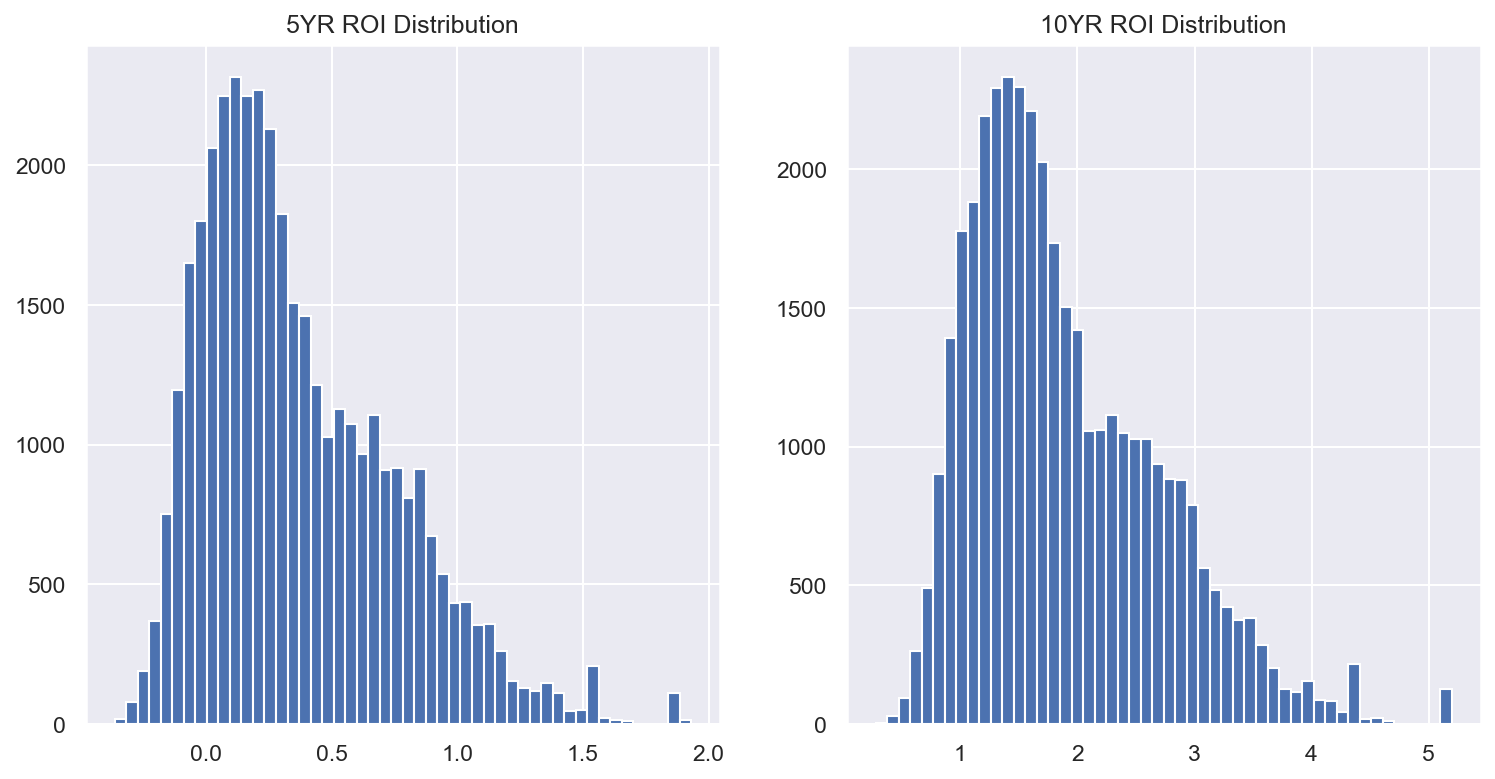

In [40]:
# side-by-side comparison

plt.subplots(nrows = 1, ncols = 2, figsize = (12, 6))

plt.subplot(121)
plt.title("5YR ROI Distribution")
plt.hist(train_imputed["roi_5yr"], bins = 50)

plt.subplot(122)
plt.title("10YR ROI Distribution")
plt.hist(train_imputed["roi_10yr"], bins = 50)

plt.show()

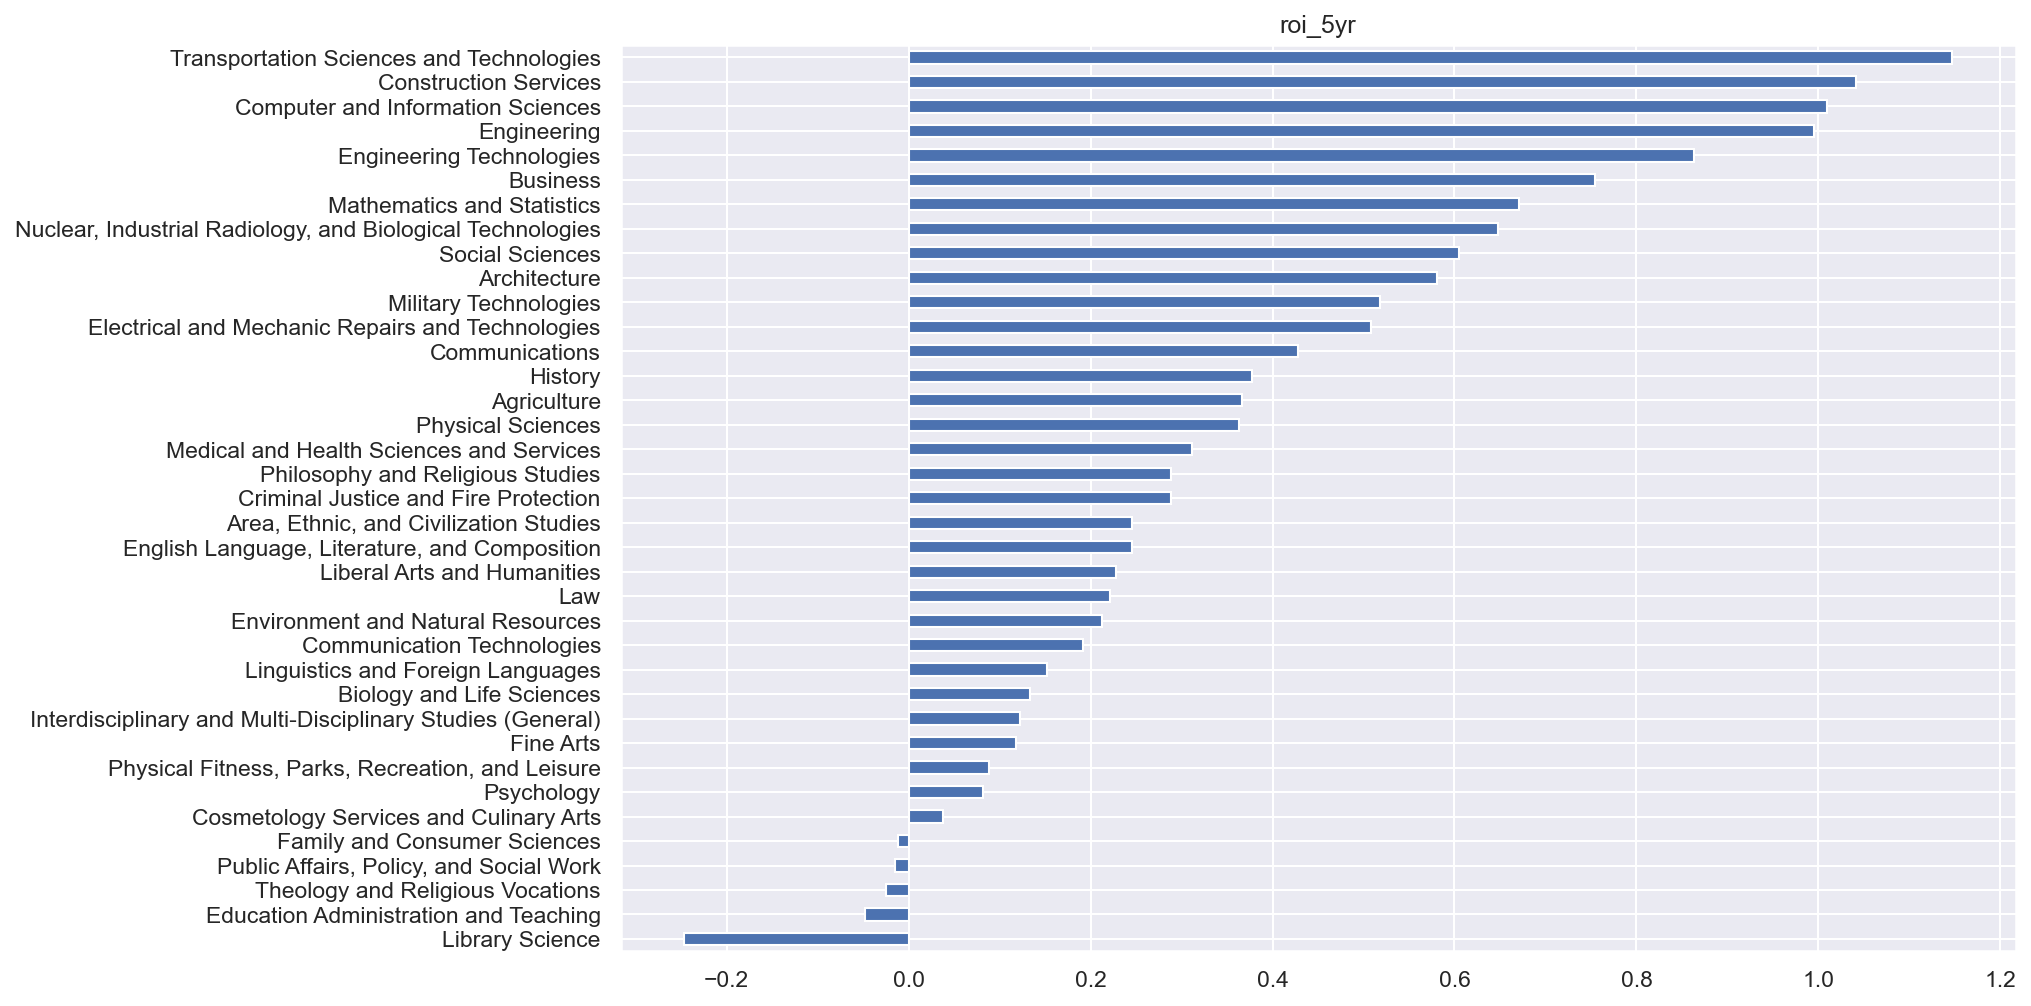

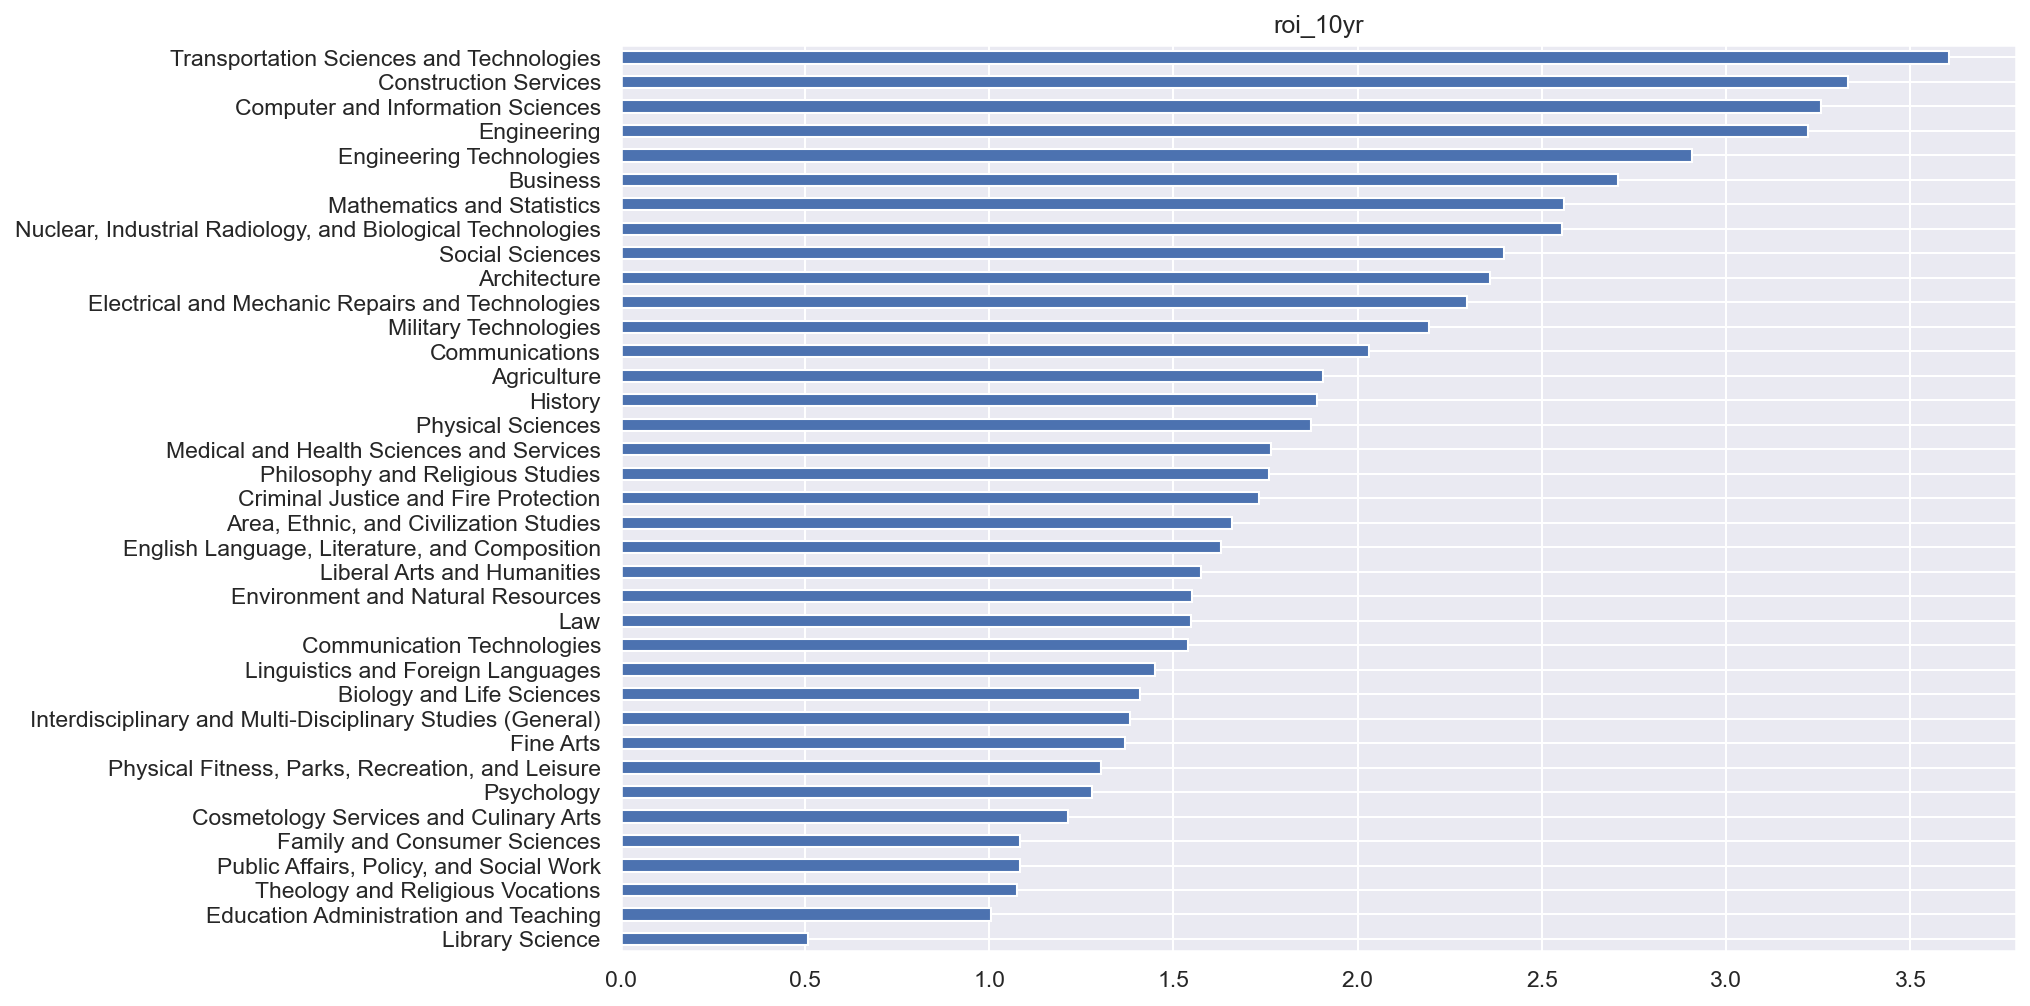

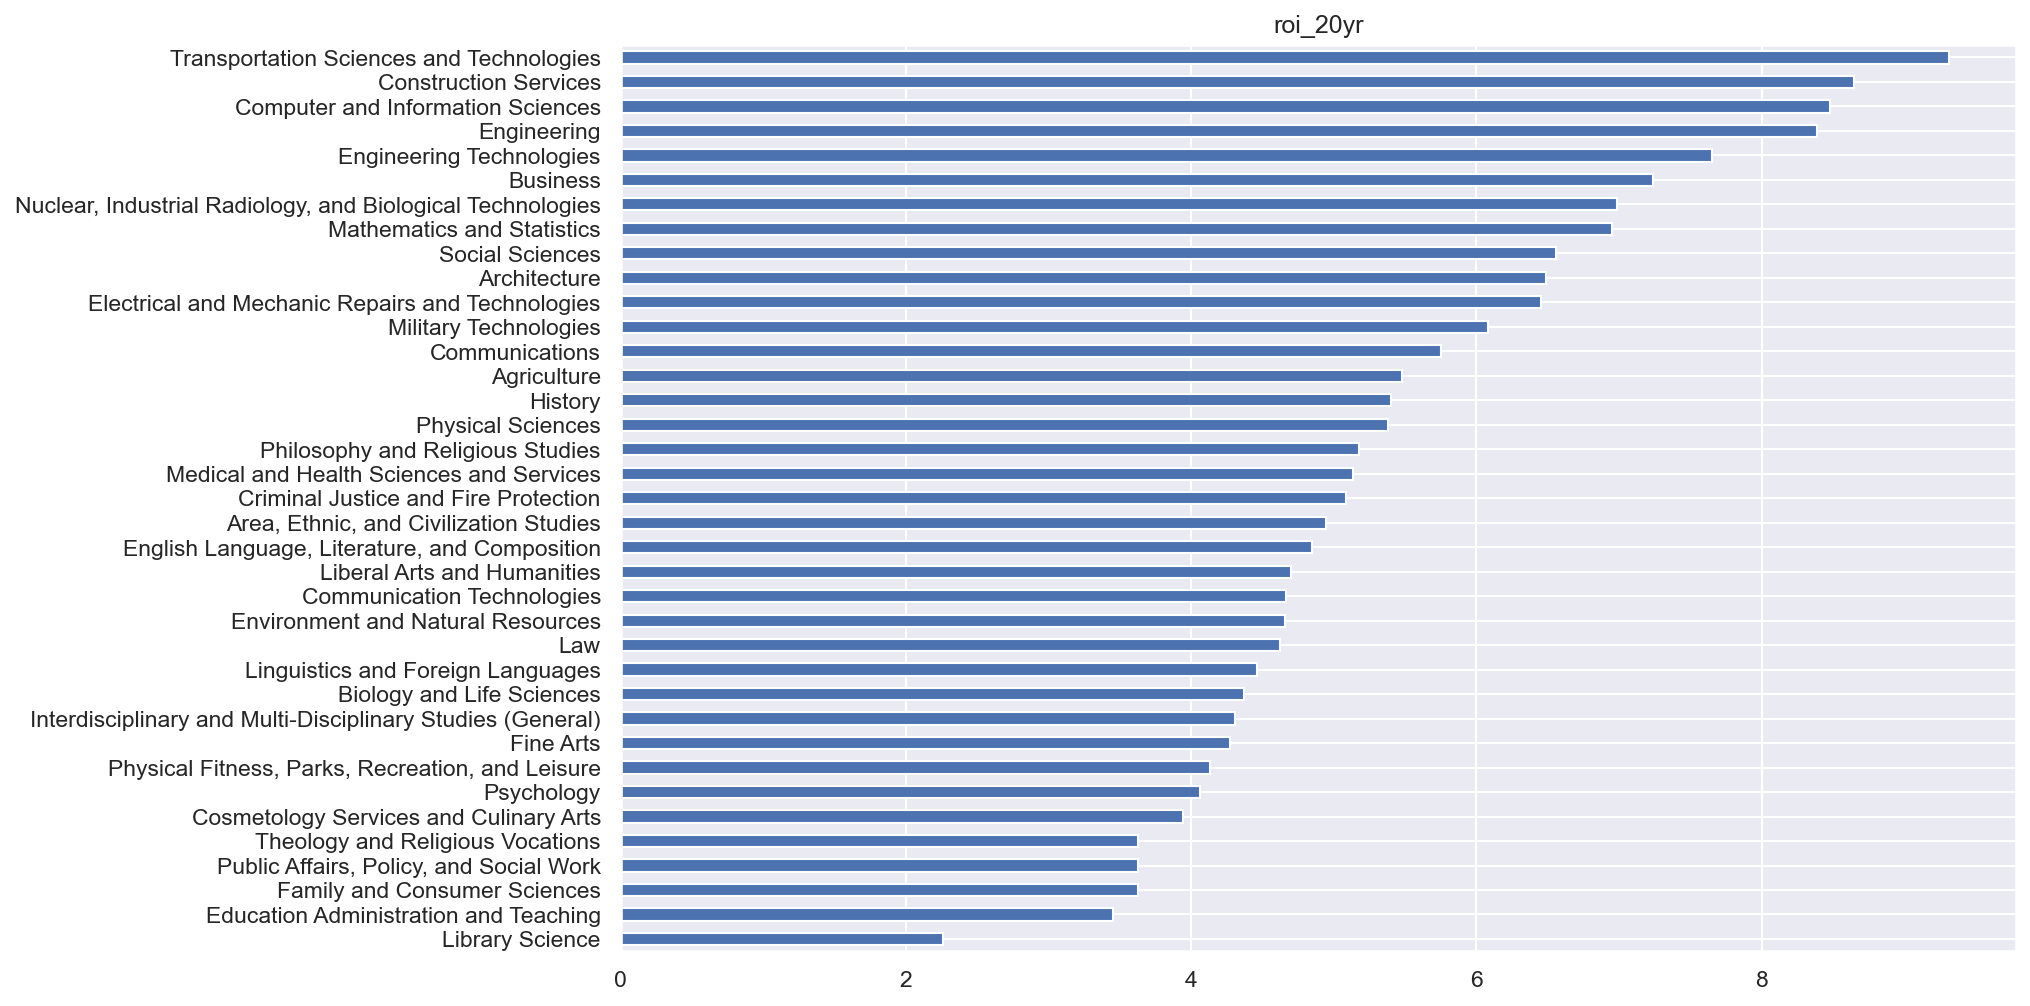

In [41]:
# are majors statistically significant in determining 5/10yr ROI
# let's plot major by their 5/10yr ROI Mean

roi_vars = ["roi_5yr", "roi_10yr", "roi_20yr"]

for i in range(len(roi_vars)):
    plt.figure(figsize = (12,8))

    train_imputed.groupby(
        ["major_category"])[roi_vars[i]].mean().sort_values().plot(
                                                    kind = "barh")

    plt.ylabel(None)
    plt.title(roi_vars[i])

    plt.savefig(roi_vars[i] + ".jpeg")
    plt.show()

**``Hypothesis Question #1:``**

**Is there a difference in ROI earnings across majors?**

Null Hypothesis: "There's not a statistical 5-year Major ROI difference college majors."

Alternative Hypothesis: "There is a statistical 5-year Major ROI difference difference college majors."

----

Null Hypothesis: "There's not a statistical 10-year Major ROI difference college majors."

Alternative Hypothesis: "There is a statistical 10-year Major ROI difference difference college majors."


alpha: 0.05

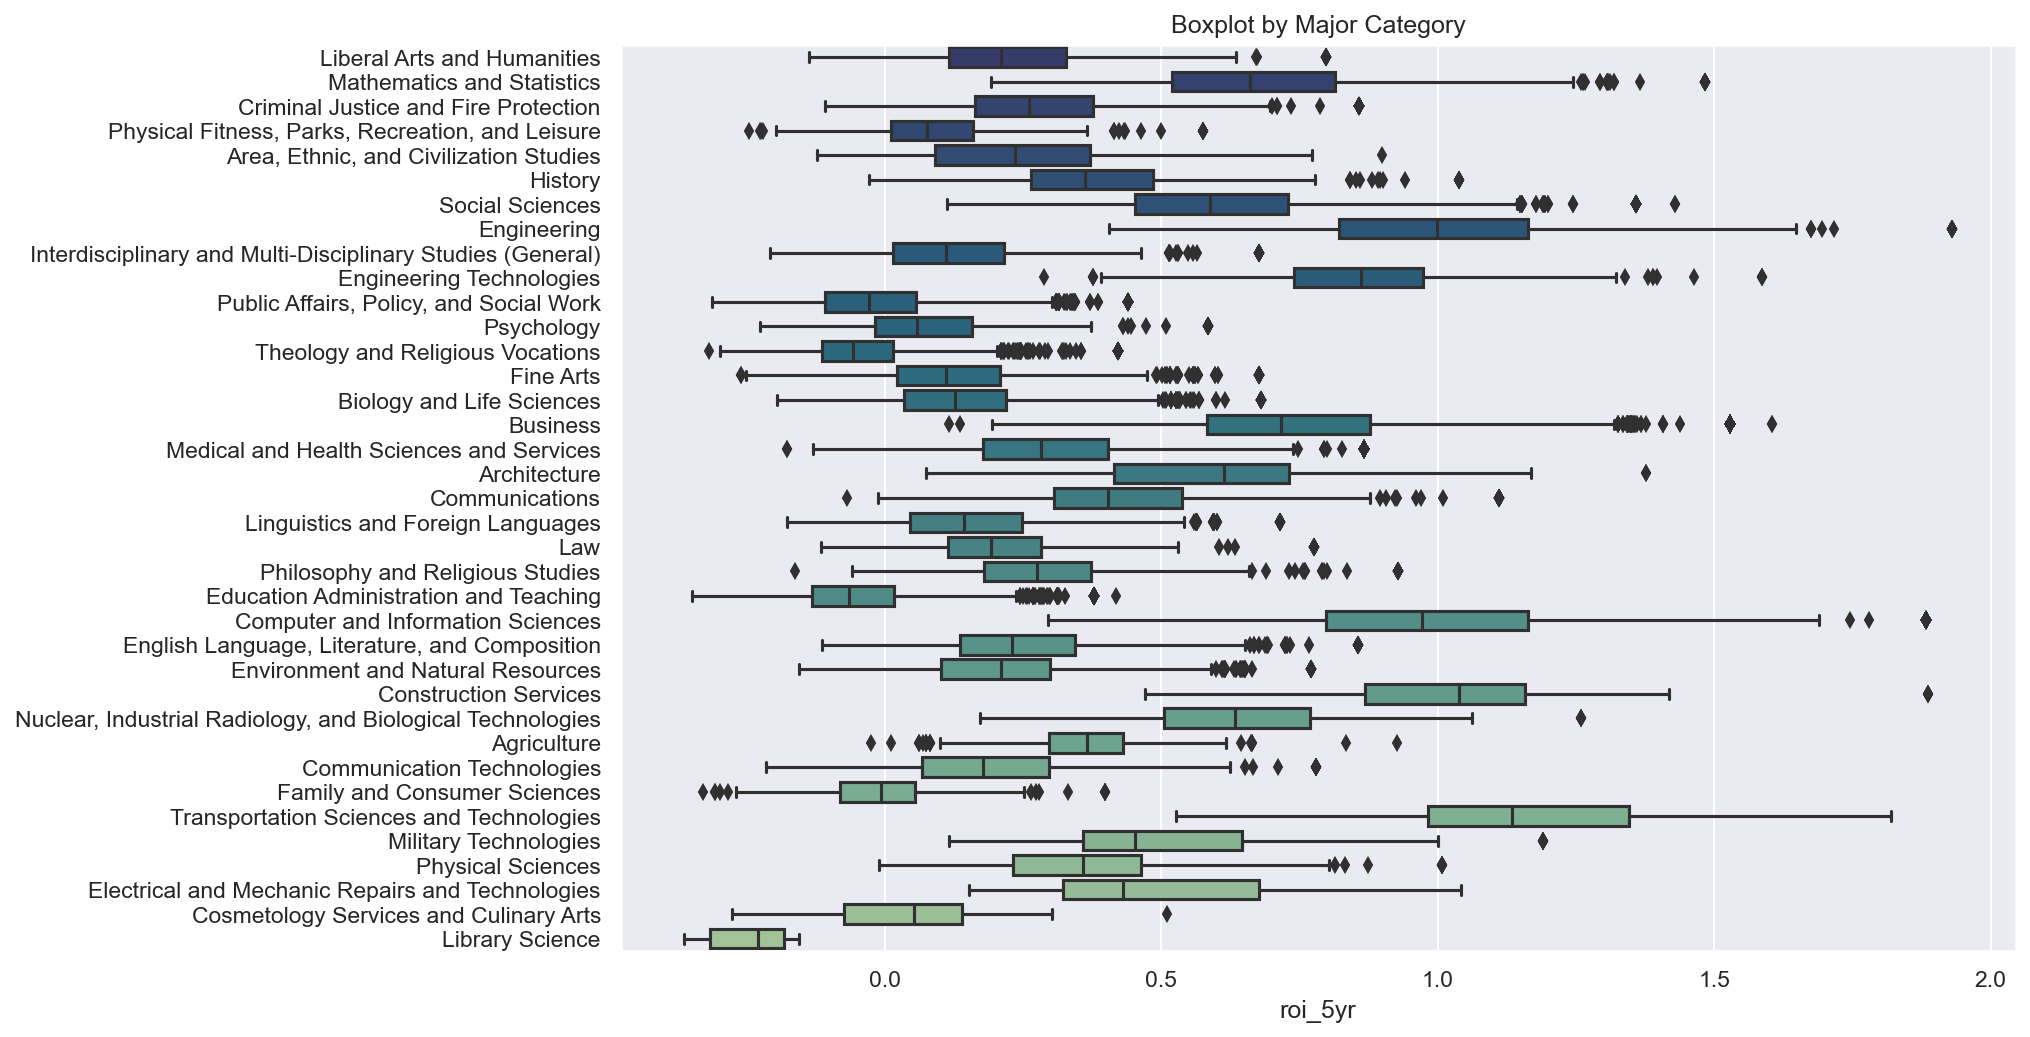

In [42]:
# bar plot?
plt.figure(figsize = (12, 8))

sns.boxplot(
    x = "roi_5yr",
    y = "major_category",
    data = train_imputed,
    orient = "h",
    palette = "crest_r"
)

plt.title("Boxplot by Major Category")
plt.ylabel(None)
plt.show()

In [43]:
majors_lst = train_imputed["major_category"].unique().tolist()
text = "train_imputed[train_imputed[major_category] == "

container = []

for major in majors_lst:
    # concat/add major name to code string
    new_text = text + "'" + major + "'" + "]['roi_5yr'].values,"
    container.append(new_text)

# for ele in container:
#     print(ele)

In [44]:
# majors_lst = train_imputed["'major_category'"].unique().tolist()

f_statistic, p_value = stats.f_oneway(
                    train_imputed[train_imputed['major_category'] == 'English Language, Literature, and Composition']['roi_5yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Communications']['roi_5yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Fine Arts']['roi_5yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Business']['roi_5yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Biology and Life Sciences']['roi_5yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Medical and Health Sciences and Services']['roi_5yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Education Administration and Teaching']['roi_5yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Interdisciplinary and Multi-Disciplinary Studies (General)']['roi_5yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Linguistics and Foreign Languages']['roi_5yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Liberal Arts and Humanities']['roi_5yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Social Sciences']['roi_5yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Physical Fitness, Parks, Recreation, and Leisure']['roi_5yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Mathematics and Statistics']['roi_5yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Communication Technologies']['roi_5yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Computer and Information Sciences']['roi_5yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Public Affairs, Policy, and Social Work']['roi_5yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Law']['roi_5yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Criminal Justice and Fire Protection']['roi_5yr'].values,
                    train_imputed[train_imputed['major_category'] == 'History']['roi_5yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Engineering']['roi_5yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Theology and Religious Vocations']['roi_5yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Psychology']['roi_5yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Environment and Natural Resources']['roi_5yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Philosophy and Religious Studies']['roi_5yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Engineering Technologies']['roi_5yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Physical Sciences']['roi_5yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Electrical and Mechanic Repairs and Technologies']['roi_5yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Area, Ethnic, and Civilization Studies']['roi_5yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Agriculture']['roi_5yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Military Technologies']['roi_5yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Cosmetology Services and Culinary Arts']['roi_5yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Family and Consumer Sciences']['roi_5yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Transportation Sciences and Technologies']['roi_5yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Nuclear, Industrial Radiology, and Biological Technologies']['roi_5yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Architecture']['roi_5yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Construction Services']['roi_5yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Library Science']['roi_5yr'].values
)

alpha = 0.05

# comparing the p_value to alpha
print(f'f statistic = {f_statistic.round(5)}')
print(f'p value = {p_value.round(5)}')
print("-----------------")

if p_value < alpha:
    print('We reject the null hypothesis. Means are different across the groups.')
else:
    print('We fail to reject the null hypothesis. Means are similar across the groups.')

f statistic = 2718.948
p value = 0.0
-----------------
We reject the null hypothesis. Means are different across the groups.


In [45]:
# what about 10 yr ROI?

f_statistic, p_value = stats.f_oneway(
                    train_imputed[train_imputed['major_category'] == 'English Language, Literature, and Composition']['roi_10yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Communications']['roi_10yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Fine Arts']['roi_10yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Business']['roi_10yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Biology and Life Sciences']['roi_10yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Medical and Health Sciences and Services']['roi_10yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Education Administration and Teaching']['roi_10yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Interdisciplinary and Multi-Disciplinary Studies (General)']['roi_10yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Linguistics and Foreign Languages']['roi_10yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Liberal Arts and Humanities']['roi_10yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Social Sciences']['roi_10yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Physical Fitness, Parks, Recreation, and Leisure']['roi_10yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Mathematics and Statistics']['roi_10yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Communication Technologies']['roi_10yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Computer and Information Sciences']['roi_10yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Public Affairs, Policy, and Social Work']['roi_10yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Law']['roi_10yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Criminal Justice and Fire Protection']['roi_10yr'].values,
                    train_imputed[train_imputed['major_category'] == 'History']['roi_10yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Engineering']['roi_10yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Theology and Religious Vocations']['roi_10yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Psychology']['roi_10yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Environment and Natural Resources']['roi_10yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Philosophy and Religious Studies']['roi_10yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Engineering Technologies']['roi_10yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Physical Sciences']['roi_10yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Electrical and Mechanic Repairs and Technologies']['roi_10yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Area, Ethnic, and Civilization Studies']['roi_10yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Agriculture']['roi_10yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Military Technologies']['roi_10yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Cosmetology Services and Culinary Arts']['roi_10yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Family and Consumer Sciences']['roi_10yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Transportation Sciences and Technologies']['roi_10yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Nuclear, Industrial Radiology, and Biological Technologies']['roi_10yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Architecture']['roi_10yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Construction Services']['roi_10yr'].values,
                    train_imputed[train_imputed['major_category'] == 'Library Science']['roi_10yr'].values
)

alpha = 0.05

# comparing the p_value to alpha
print(f'f statistic = {f_statistic.round(5)}')
print(f'p value = {p_value.round(5)}')
print("-----------------")

if p_value < alpha:
    print('We reject the null hypothesis. Means are different across the groups.')
else:
    print('We fail to reject the null hypothesis. Means are similar across the groups.')

f statistic = 2728.01525
p value = 0.0
-----------------
We reject the null hypothesis. Means are different across the groups.


**``Observations:``**

- There appears to be a statistical significance across the college major categories and the 5-10yr ROI

----

**``Hypothesis Question #2: ``**

**Is there a difference in ROI earnings across public/private/’other’ controlled institutions?**

Null Hypothesis: "There's not a statistical 5-year Major ROI difference across institution control."

Alternative Hypothesis: "There is a statistical 5-year Major ROI difference difference across institution control."

--
<br>

Null Hypothesis: "There's not a statistical 10-year Major ROI difference across institution control."

Alternative Hypothesis: "There is a statistical 10-year Major ROI difference difference across institution control."


alpha: 0.05

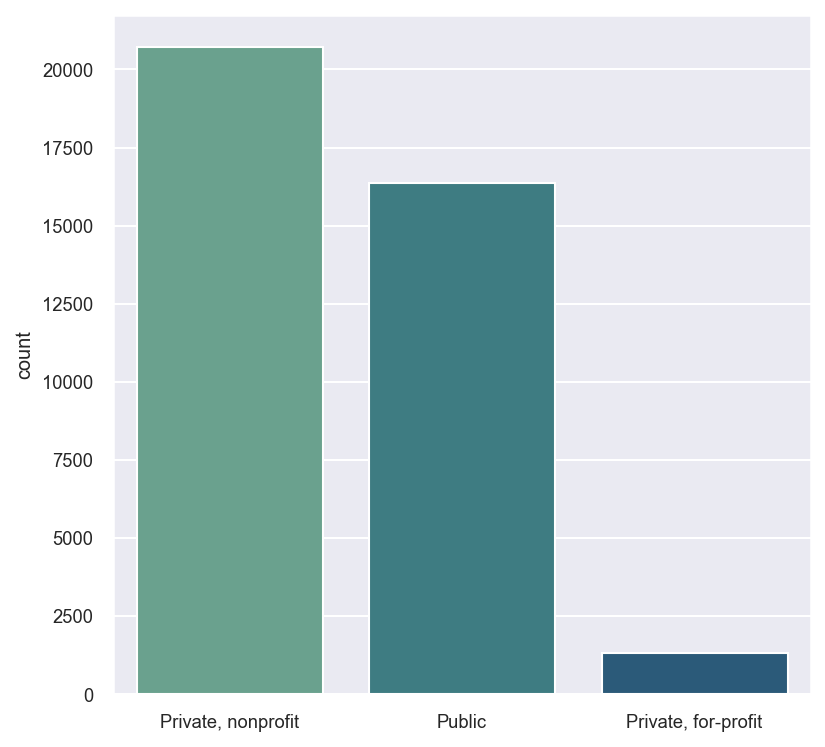

In [46]:
# viewing institution control by the numbers

plt.figure(figsize=(6, 6))
sns.set(font_scale = .8)

sns.countplot(
    train_imputed["institution_control"],
    order = train_imputed["institution_control"].value_counts().index,
    palette="crest")

plt.xlabel(None)
plt.show()

In [47]:
# observations 
# private - non for profit wins out with most records in the training dataset
# where foreign is the least number of observations

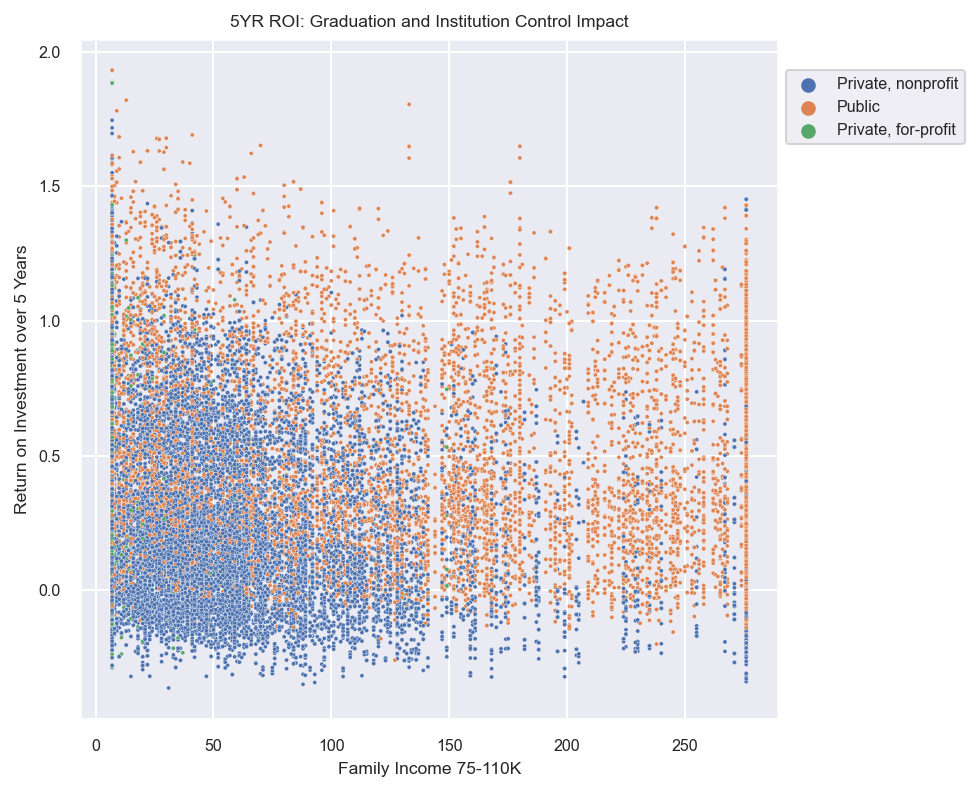

In [48]:
# plotting institution control type by 5_year ROI

plt.figure(figsize = (6, 6))
sns.set(font_scale = 0.7)

g = sns.scatterplot( 
    x = train_imputed["income_75001_110000"],
    y = train_imputed["roi_5yr"],
    data = train_imputed,
    hue = train_imputed["institution_control"],
    s = 4
)

g.legend(loc='center left', bbox_to_anchor=(1, 0.9), ncol=1)
plt.title("5YR ROI: Graduation and Institution Control Impact")
plt.xlabel("Family Income 75-110K")
plt.ylabel("Return on Investment over 5 Years")
plt.show()

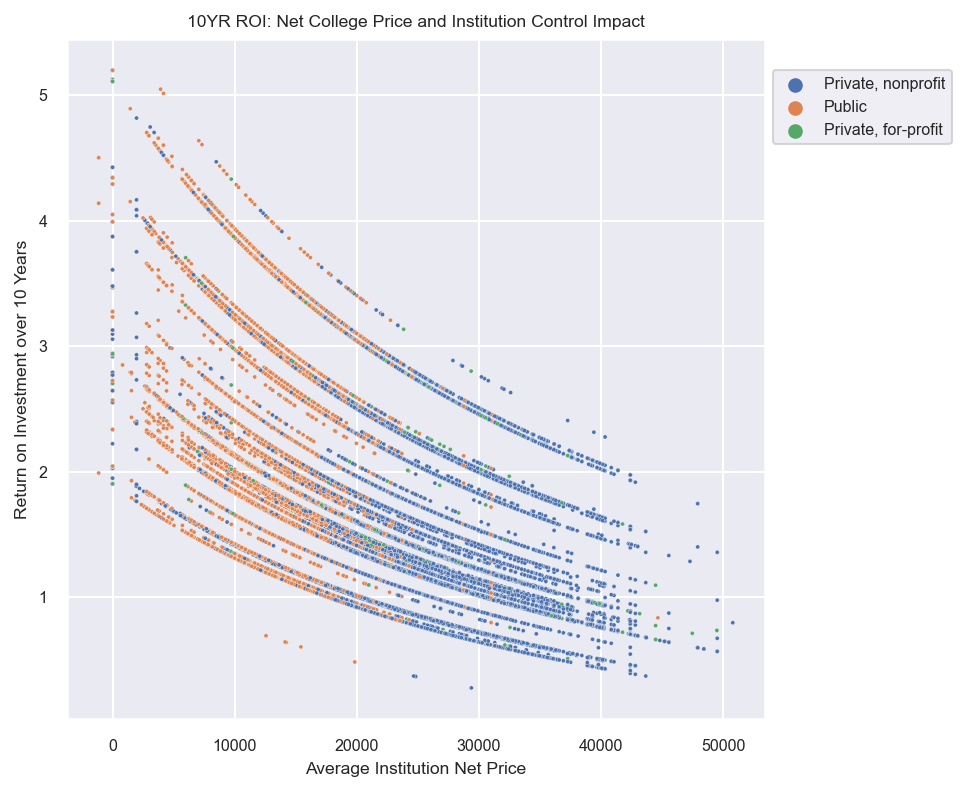

In [49]:
# plotting institution control type by 10_year ROI

plt.figure(figsize = (6, 6))
sns.set(font_scale = 0.7)

# data = train_imputed[train_imputed["graduate_number"] > 0]

g = sns.scatterplot( 
    x = train_imputed["avg_net_price"],
    y = train_imputed["roi_10yr"],
    hue = train_imputed["institution_control"],
    s = 4
)

g.legend(loc='center left', bbox_to_anchor=(1, 0.9), ncol=1)
plt.title("10YR ROI: Net College Price and Institution Control Impact")
plt.xlabel("Average Institution Net Price")
plt.ylabel("Return on Investment over 10 Years")
plt.show()

In [50]:
# 5YR/major average capture

majors = train_imputed["major_category"].unique().tolist()

pub_container = []
pri_profit_container = []
pri_nonprofit_container = []
forein_container = []

for major in majors:
    
    pub_values = train_imputed[(train_imputed["institution_control"] == "Public") & (train_imputed["major_category"] == major)]["roi_5yr"].values
    pri_profit_values = train_imputed[(train_imputed["institution_control"] == "Private, for-profit") & (train_imputed["major_category"] == major)]["roi_5yr"].values
    pri_nonprofit_values = train_imputed[(train_imputed["institution_control"] == "Private, nonprofit") & (train_imputed["major_category"] == major)]["roi_5yr"].values
    foreign_values = train_imputed[(train_imputed["institution_control"] == "Foreign") & (train_imputed["major_category"] == major)]["roi_5yr"].values

    # extend values
    pub_container.extend(pub_values)
    pri_profit_container.extend(pri_profit_values)
    pri_nonprofit_container.extend(pri_nonprofit_values)
    forein_container.extend(foreign_values)

print(f'length: {len(pub_container)}')
print(f'length: {len(pri_profit_container)}')
print(f'length: {len(pri_nonprofit_container)}')
print(f'length: {len(forein_container)}')

length: 16359
length: 1308
length: 20718
length: 0


In [51]:
# ANOVA hypothesis test for: institution control

f_statistic, p_value = stats.f_oneway(
    pub_container,
    pri_profit_container,
    pri_nonprofit_container,
    forein_container
    )

alpha = 0.05

# comparing the p_value to alpha
print(f'f statistic = {f_statistic.round(5)}')
print(f'p value = {p_value.round(5)}')
print("-----------------")

if p_value < alpha:
    print('We reject the null hypothesis. Means are different across the groups.')
else:
    print('We fail to reject the null hypothesis. Means are similar across the groups.')

AttributeError: 'float' object has no attribute 'round'

In [ ]:
# 10yr/major average capture

majors = train_imputed["major_category"].unique().tolist()

pub_container = []
pri_profit_container = []
pri_nonprofit_container = []
forein_container = []

for major in majors:
    pub_mean = train_imputed[(train_imputed["institution_control"] == "Public") & (train_imputed["major_category"] == major)]["roi_10yr"].values
    pri_profit_mean = train_imputed[(train_imputed["institution_control"] == "Private, for-profit") & (train_imputed["major_category"] == major)]["roi_10yr"].values
    pri_nonprofit_mean = train_imputed[(train_imputed["institution_control"] == "Private, nonprofit") & (train_imputed["major_category"] == major)]["roi_10yr"].values
    foreign_mean = train_imputed[(train_imputed["institution_control"] == "Foreign") & (train_imputed["major_category"] == major)]["roi_10yr"].values

    # extend values
    pub_container.extend(pub_mean)
    pri_profit_container.extend(pri_profit_mean)
    pri_nonprofit_container.extend(pri_nonprofit_mean)
    forein_container.extend(foreign_mean)

print(f'length: {len(pub_container)}')
print(f'length: {len(pri_profit_container)}')
print(f'length: {len(pri_nonprofit_container)}')
print(f'length: {len(forein_container)}')

length: 16389
length: 1786
length: 20834
length: 986


In [ ]:
# ANOVA hypothesis test for: institution control

f_statistic, p_value = stats.f_oneway(
    pub_container,
    pri_profit_container,
    pri_nonprofit_container,
    forein_container
    )

alpha = 0.05

# comparing the p_value to alpha
print(f'f statistic = {f_statistic.round(5)}')
print(f'p value = {p_value.round(5)}')
print("-----------------")

if p_value < alpha:
    print('We reject the null hypothesis. Means are different across the groups.')
else:
    print('We fail to reject the null hypothesis. Means are similar across the groups.')

f statistic = 2874.30177
p value = 0.0
-----------------
We reject the null hypothesis. Means are different across the groups.


``observations:``

A college's institutional control is statistically significant in potentially predicting a student's 5 and 10 year ROI

In [ ]:
pd.set_option("display.max_columns", None)
train_imputed[train_imputed["graduate_number"] < 0.0].head()

# where graduate_number == "graduate students"
# choosing to leave this variable

unit_id_institution                           college_name  \
1948              156295.0                          Berea College   
64452             133492.0                         Eckerd College   
65370             128771.0                Crowley's Ridge College   
28316             159382.0  Louisiana State University-Alexandria   
50331             228343.0                Southwestern University   

      institution_control state_post_code    zip_code              city  \
1948   Private, nonprofit              KY  40404-2182             Berea   
64452  Private, nonprofit              FL  33711-4700  Saint Petersburg   
65370  Private, nonprofit              AR       72450         Paragould   
28316              Public              LA  71302-9121        Alexandria   
50331  Private, nonprofit              TX       78626        Georgetown   

       region_ipeds  title_IV_eligibility  pred_degree  pred_degree_0and4  \
1948            5.0                   1.0          3.0                3.0   
64452           5.0                   1.0          3.0                3.0   
65370           5.0                   1.0          3.0                3.0   
28316           5.0                   1.0          3.0                3.0   
50331           6.0                   1.0          3.0                3.0   

             degree_name  degree_code  major_code  \
1948   Bachelor’s Degree          3.0      1905.0   
64452  Bachelor’s Degree          3.0      4227.0   
65370  Bachelor’s Degree          3.0      3802.0   
28316  Bachelor’s Degree          3.0      2701.0   
50331  Bachelor’s Degree          3.0      5201.0   

                                    major_name  branch_number  \
1948   Foods, Nutrition, and Related Services.            1.0   
64452    Research and Experimental Psychology.            1.0   
65370              Religion/Religious Studies.            1.0   
28316                             Mathematics.            1.0   
50331              Business/Commerce, General.            1.0   

       avg_net_price_public  avg_net_price_private  \
1948                    0.0                 1964.0   
64452                   0.0                29482.0   
65370                   0.0                13334.0   
28316                7835.0                    0.0   
50331                   0.0                26393.0   

       full_time_net_tuition_revenue  off_campus_cost_of_attendace  \
1948                          5364.0                        6764.0   
64452                        23475.0                       12586.0   
65370                         7608.0                        6652.0   
28316                         5587.0                        9072.0   
50331                        16828.0                       11640.0   

       on_campus_cost_of_attendace  admission_rate  graduate_number  \
1948                        8158.0          0.4052     -1954.135473   
64452                      12586.0          0.6766      -258.078182   
65370                       8158.0          0.6594     -1103.663910   
28316                       8158.0          0.5645       -53.112648   
50331                      11340.0          0.4502     -1044.026256   

       ACT_score_mid  avg_sat_admitted  required_score  avg_faculty_salary  \
1948         25.0000          1192.000        1.000000              8137.0   
64452        26.0000          1205.000        1.000000              7937.0   
65370        23.5598          1143.869        1.544167              5742.0   
28316        20.0000          1050.000        1.000000              6162.0   
50331        26.0000          1238.000        1.000000              8274.0   

       online_only  comp_rt_ft_150over_expected_time  \
1948           0.0                            0.6282   
64452          0.0                            0.6799   
65370          0.0                            0.4444   
28316          0.0                            0.3252   
50331          0.0                            

In [ ]:
# what about the share of first time - full time students by major?

train_imputed[train_imputed["major_category"] == "Agriculture"]["share_entering_students_first_ft"].mean()

0.7380679104477605

In [ ]:
s = train_imputed.groupby(["major_category"])["share_entering_students_first_ft"].mean()
s = s.sort_values(ascending = False)

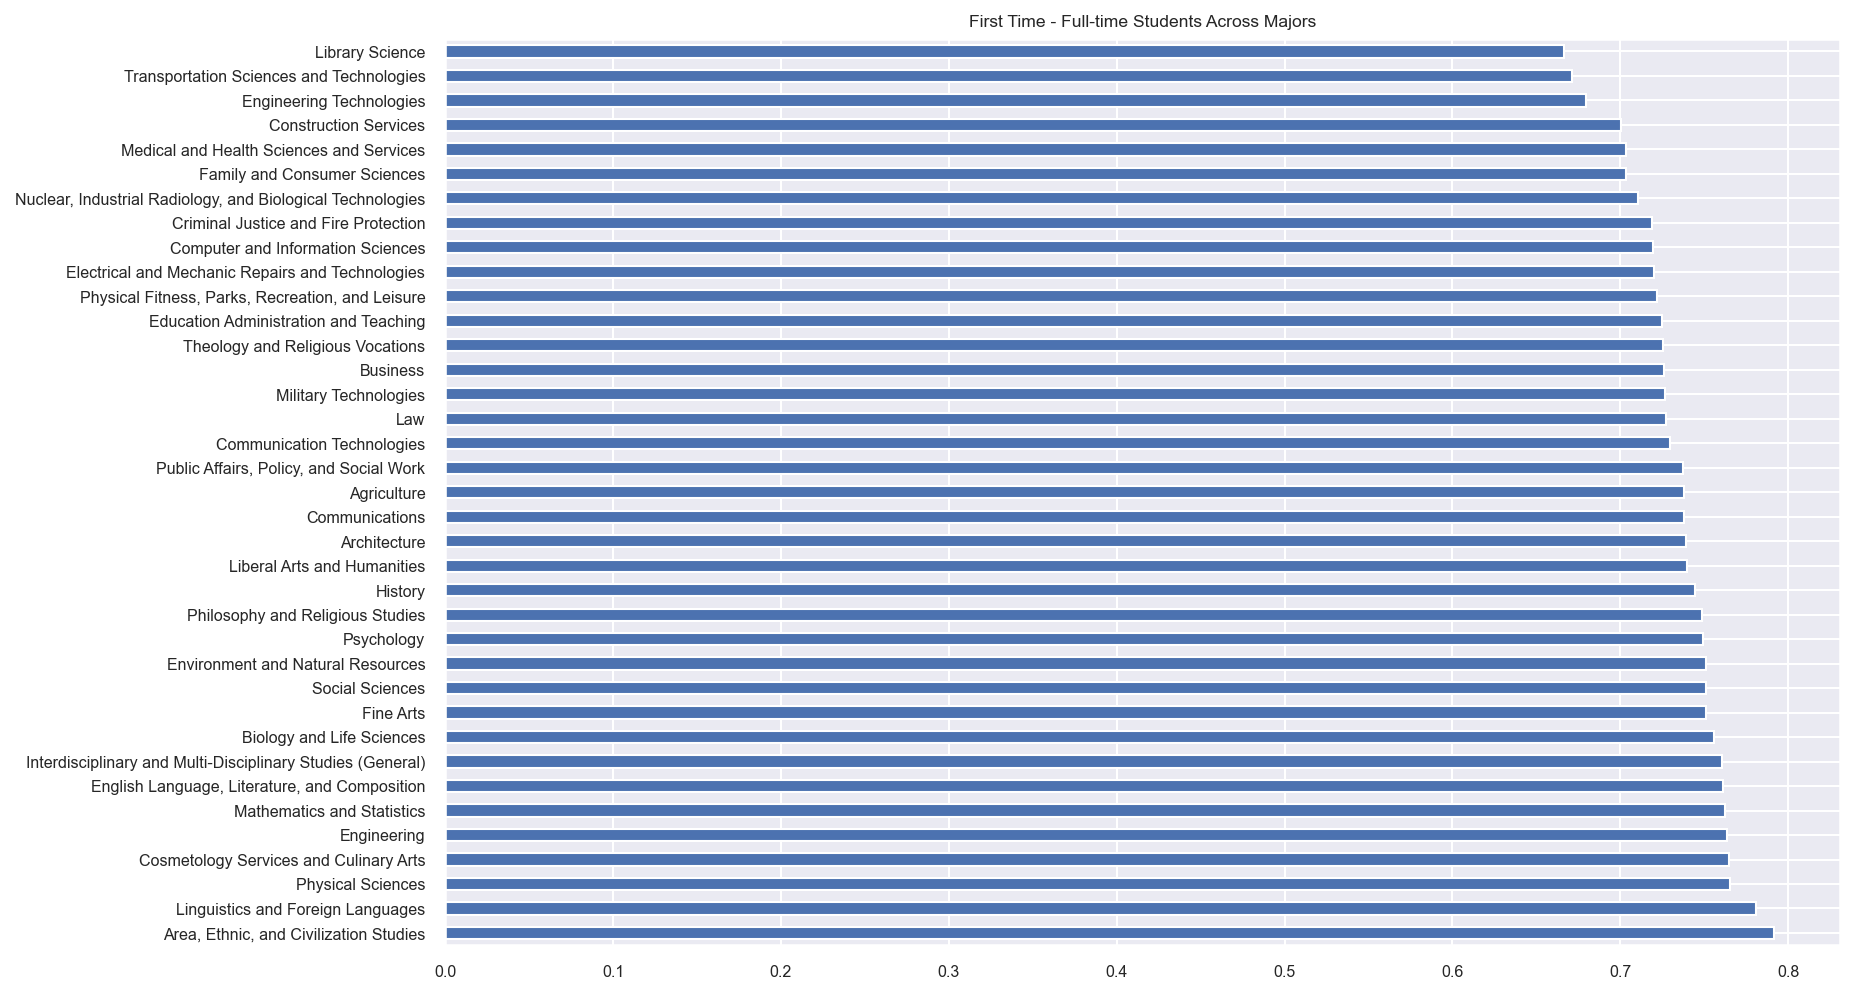

In [ ]:
# plotting first-time - full-time student average by major

plt.figure(figsize = (12,8))
s.plot(kind = "barh")

plt.title("First Time - Full-time Students Across Majors")
plt.ylabel(None)
plt.show()

In [ ]:
# function to iterate and print major syntax for hypothesis testing

# def print_major_syntax(train_df):
#     majors_lst = train_df["major_category"].unique().tolist()
#     text1 = "train_imputed[(train_imputed['major_category'] == "
#     text2 = "(train_imputed['share_entering_students_first_ft'])]['roi_5yr'].values,"

#     container = []

#     for major in majors_lst:
#         # concat/add major name to code string
#         new_text = text + "'" + major + "'" + "]['roi_5yr'].values,"
#         container.append(new_text)

#     return container

In [ ]:
# shape check

train_imputed.shape

(39995, 112)

In [ ]:
# creating bins of 'first-time, full-time student rates'
# "rate of full time students by major"
# (0.47, 0.623] < (0.623, 0.753] < (0.753, 0.871] < (0.871, 0.962)

train_imputed['share_entering_ft_binned'] = pd.qcut(
    train_imputed['share_entering_students_first_ft'], \
    q = 4, \
    labels = ["below_average", "average", "above_average", "highest_average"])

validate_imputed['share_entering_ft_binned'] = pd.qcut(
    validate_imputed['share_entering_students_first_ft'], \
    q = 4, \
    labels = ["below_average", "average", "above_average", "highest_average"])

test_imputed['share_entering_ft_binned'] = pd.qcut(
    test_imputed['share_entering_students_first_ft'], \
    q = 4, \
    labels = ["below_average", "average", "above_average", "highest_average"])

train_imputed.head() # checks out

unit_id_institution            college_name institution_control  \
25530             220862.0   University of Memphis              Public   
53875             218238.0    Limestone University  Private, nonprofit   
42932             228459.0  Texas State University              Public   
45495             146339.0       Judson University  Private, nonprofit   
25003             197708.0      Yeshiva University  Private, nonprofit   

      state_post_code    zip_code        city  region_ipeds  \
25530              TN       38152     Memphis           5.0   
53875              SC  29340-3799     Gaffney           5.0   
42932              TX       78666  San Marcos           6.0   
45495              IL  60123-1498       Elgin           3.0   
25003              NY  10033-3299    New York           2.0   

       title_IV_eligibility  pred_degree  pred_degree_0and4  \
25530                   1.0          3.0                3.0   
53875                   1.0          3.0                3.0   
42932                   1.0          3.0                3.0   
45495                   1.0          3.0                3.0   
25003                   1.0          3.0                3.0   

             degree_name  degree_code  major_code  \
25530  Bachelor’s Degree          3.0      1101.0   
53875  Bachelor’s Degree          3.0      1101.0   
42932  Bachelor’s Degree          3.0      5004.0   
45495  Bachelor’s Degree          3.0      5203.0   
25003  Bachelor’s Degree          3.0      1612.0   

                                              major_name  branch_number  \
25530                                        Journalism.            1.0   
53875                   Communication and Media Studies.            1.0   
42932                           Design and Applied Arts.            1.0   
45495                   Accounting and Related Services.            1.0   
25003  Classics and Classical Languages, Literatures,...            1.0   

       avg_net_price_public  avg_net_price_private  \
25530               13048.0                    0.0   
53875                   0.0                24083.0   
42932               14692.0                    0.0   
45495                   0.0                20498.0   
25003                   0.0                29482.0   

       full_time_net_tuition_revenue  off_campus_cost_of_attendace  \
25530                         7992.0                        9975.0   
53875                        13130.0                        7115.0   
42932                         8302.0                        8570.0   
45495                        10505.0                        8000.0   
25003                        17888.0                       13283.0   

       on_campus_cost_of_attendace  admission_rate  graduate_number  \
25530                       9975.0          0.8430           4225.0   
53875                       8808.0          0.4416            106.0   
42932                       9660.0          0.7778           4457.0   
45495                       9988.0          0.7101            222.0   
25003                      12000.0          0.6028           3751.0   

       ACT_score_mid  avg_sat_admitted  required_score  avg_faculty_salary  \
25530           23.0            1133.0             1.0              8934.0   
53875           21.0            1055.0             1.0              5742.0   
42932           23.0            1109.0             1.0              8000.0   
45495           22.0            1086.0             1.0              6413.0   
25003           26.0            1259.0             1.0             12178.0   

       online_only  comp_rt_ft_150over_expected_time  \
25530          0.0                            0.4780   
53875          0.0                            0.3514   
42932          0.0                            0.5547   
45495          0.0                            0.6364   
25003          0.0                            0.8311   

       comp_rt_ft_150over_expected_time_two_races  \
25

In [ ]:
# checking datasets after transformation 

print(f'train shape: {train_imputed.shape}')
print(f'validate shape: {validate_imputed.shape}')
print(f'test shape: {test_imputed.shape}')

train shape: (39995, 113)
validate shape: (17142, 113)
test shape: (14285, 113)


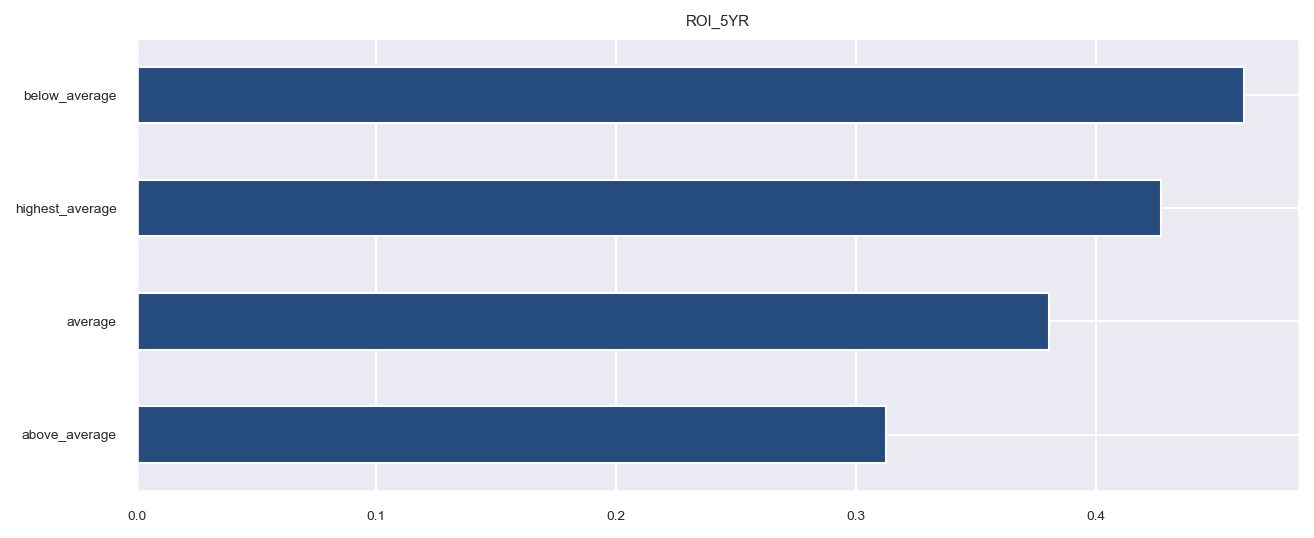

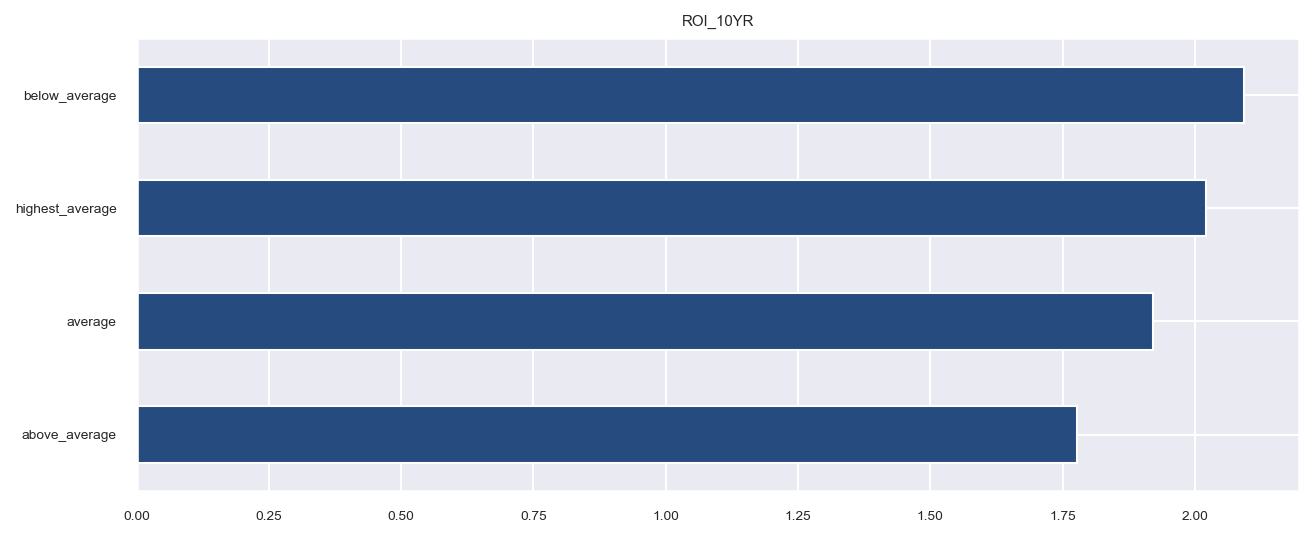

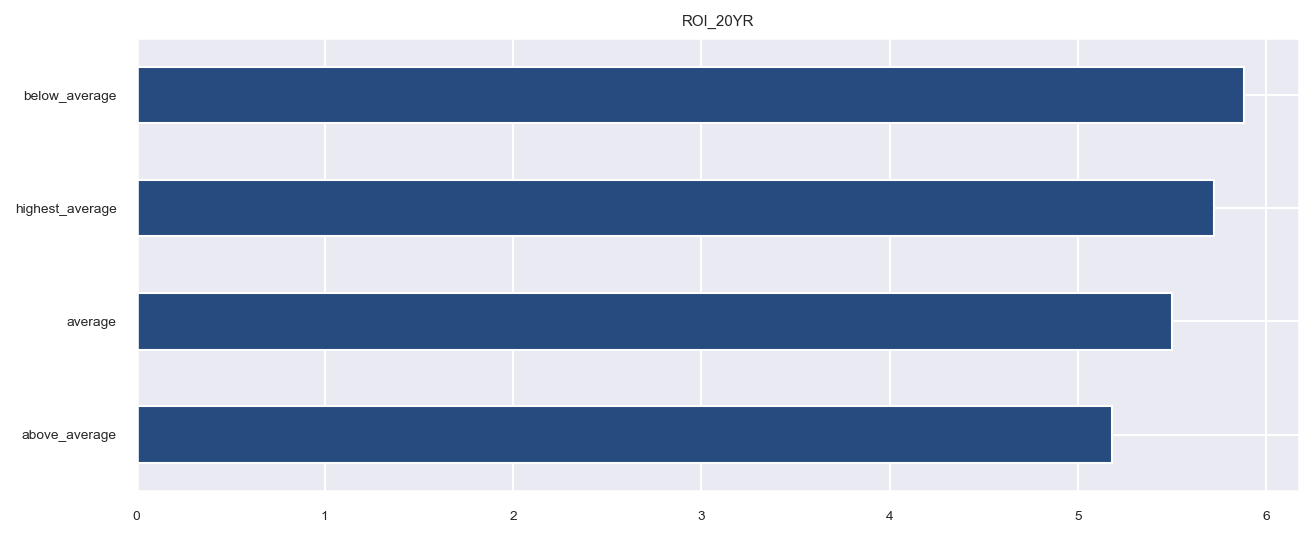

In [ ]:
# plotting roi by share of first-time, full-time students

roi_vars = ["roi_5yr", "roi_10yr", "roi_20yr"]

for i in range(len(roi_vars)):

    plt.figure(figsize = (10,4))
    sns.set(font_scale = 0.6, palette = "crest_r")

    train_imputed.groupby(["share_entering_ft_binned"])[roi_vars[i]].mean().sort_values().plot(kind = "barh")

    plt.title(roi_vars[i].upper())
    plt.ylabel(None)
    plt.xlabel(None)

    plt.show()

In [ ]:
train_imputed.select_dtypes(include = "number").columns.tolist()

['unit_id_institution',
 'region_ipeds',
 'title_IV_eligibility',
 'pred_degree',
 'pred_degree_0and4',
 'degree_code',
 'major_code',
 'branch_number',
 'avg_net_price_public',
 'avg_net_price_private',
 'full_time_net_tuition_revenue',
 'off_campus_cost_of_attendace',
 'on_campus_cost_of_attendace',
 'admission_rate',
 'graduate_number',
 'ACT_score_mid',
 'avg_sat_admitted',
 'required_score',
 'avg_faculty_salary',
 'online_only',
 'comp_rt_ft_150over_expected_time',
 'comp_rt_ft_150over_expected_time_two_races',
 'comp_rt_ft_150over_expected_time_native_american',
 'comp_rt_ft_150over_expected_time_asian',
 'comp_rt_ft_150over_expected_time_black',
 'comp_rt_ft_150over_expected_time_hispanic',
 'comp_rt_ft_150over_expected_time_non_resident',
 'comp_rt_ft_150over_expected_time_unknown_race',
 'comp_rt_ft_150over_expected_time_white',
 'share_entering_students_first_ft',
 'share_of_part_time',
 'first_time_ft_student_retention',
 'first_time_pt_student_retention',
 'enrollment_shar

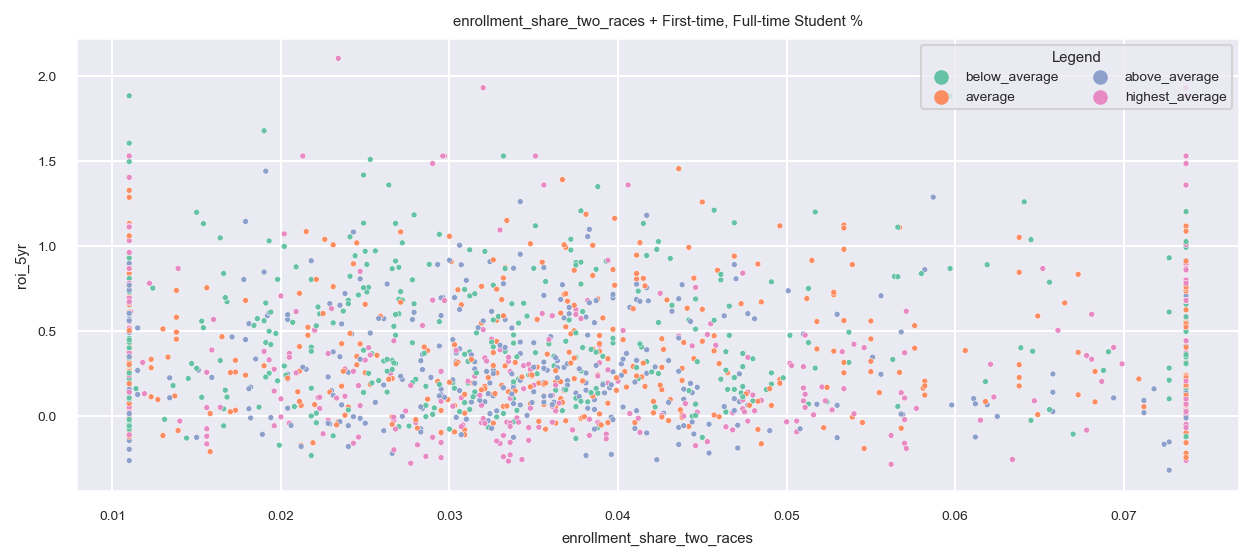

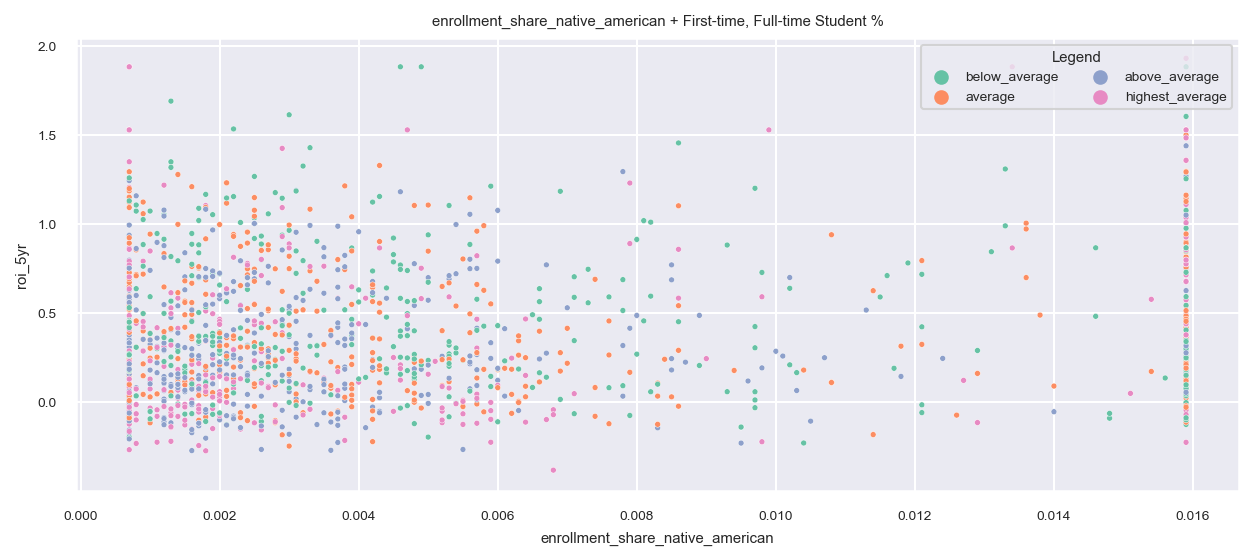

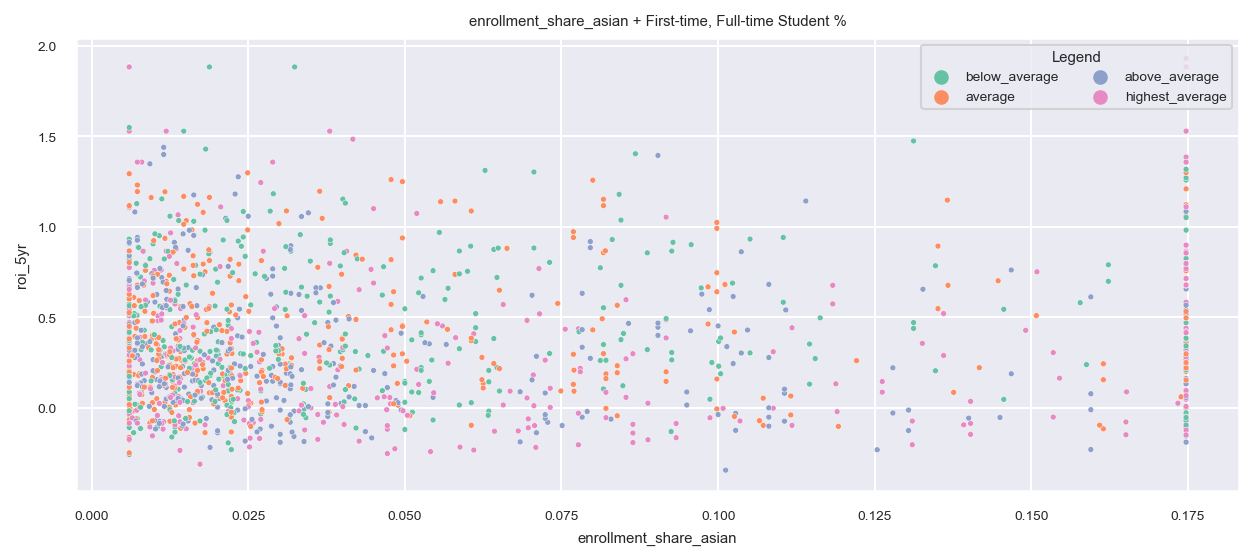

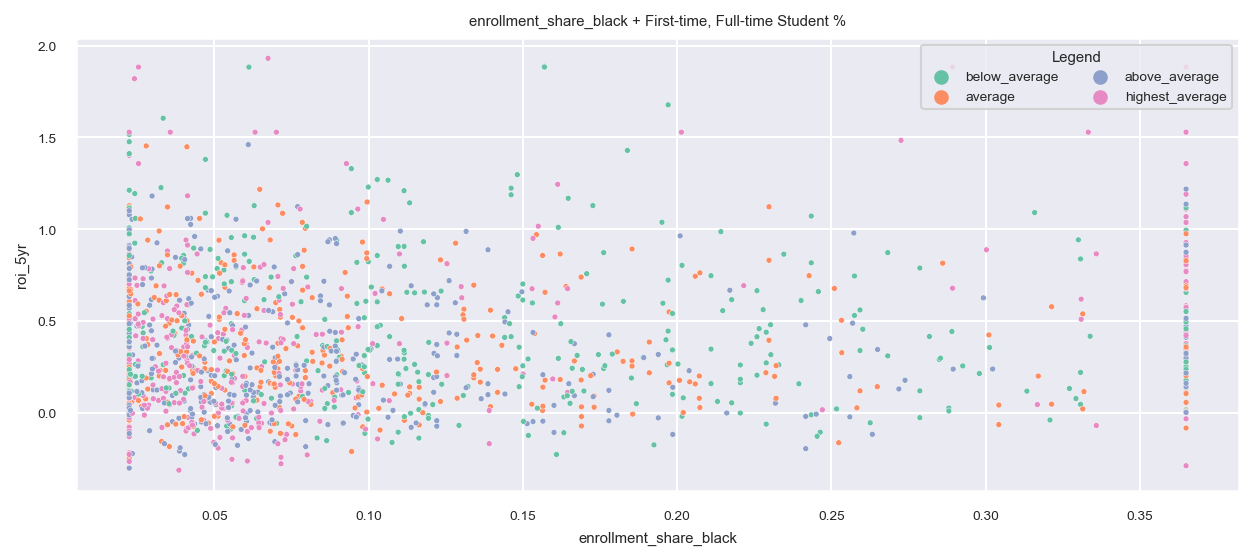

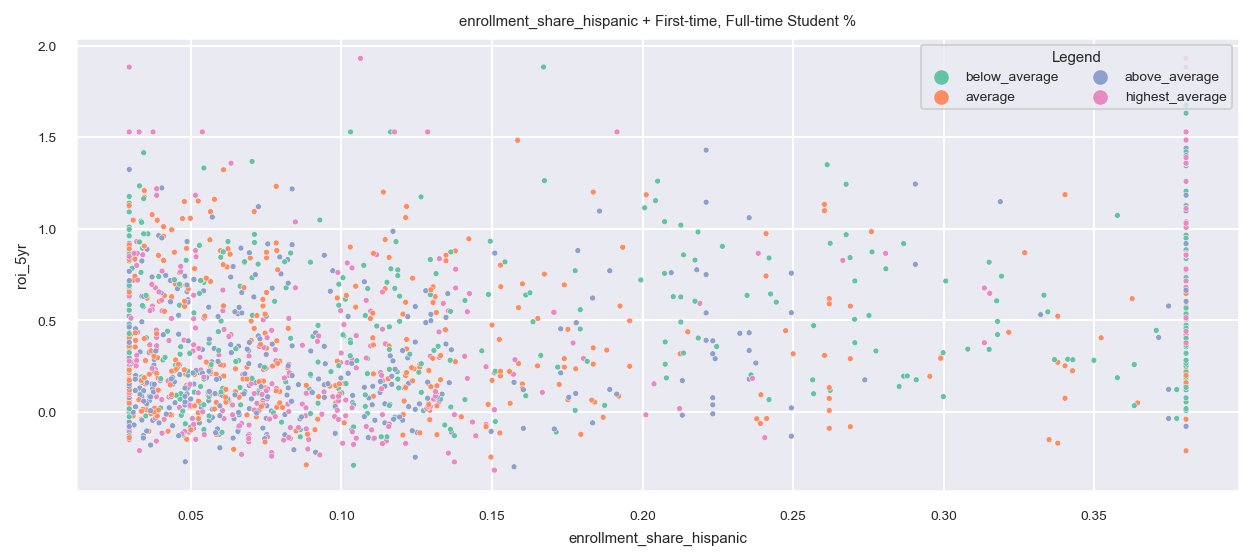

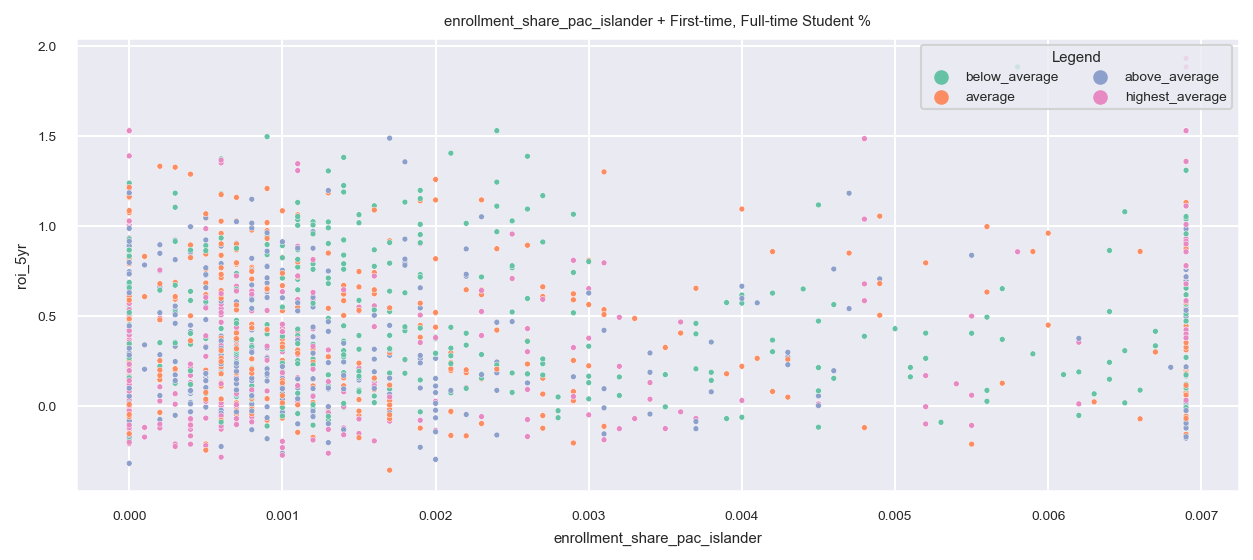

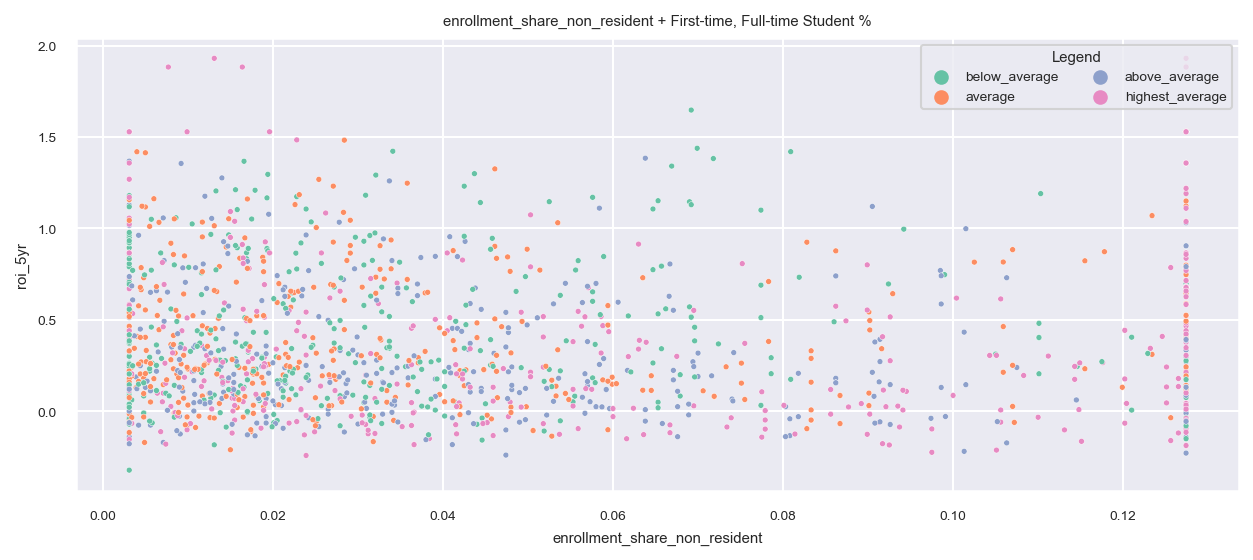

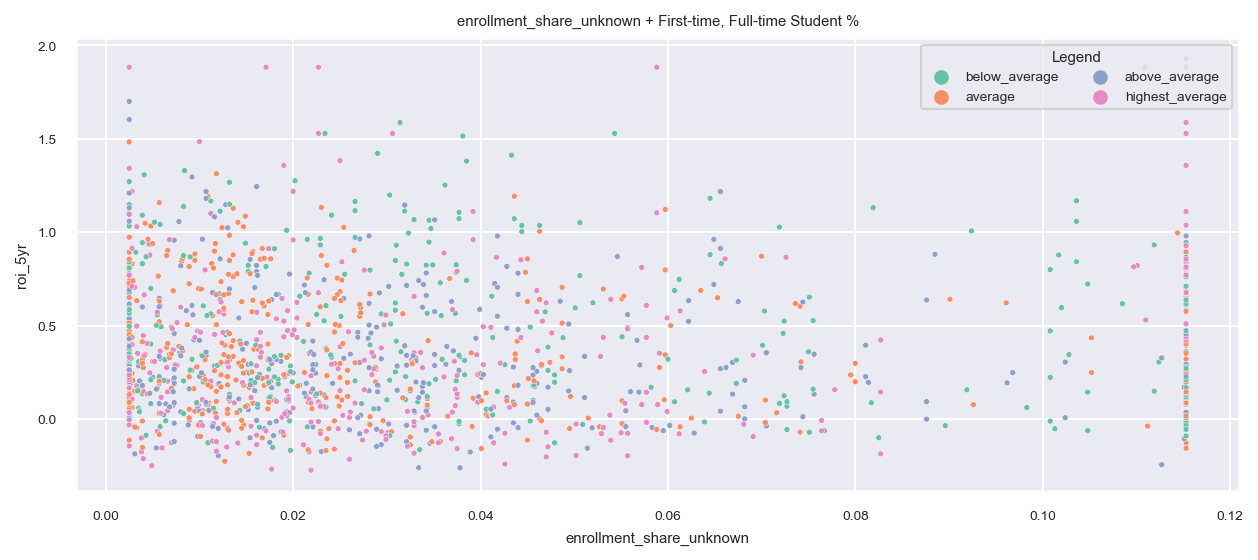

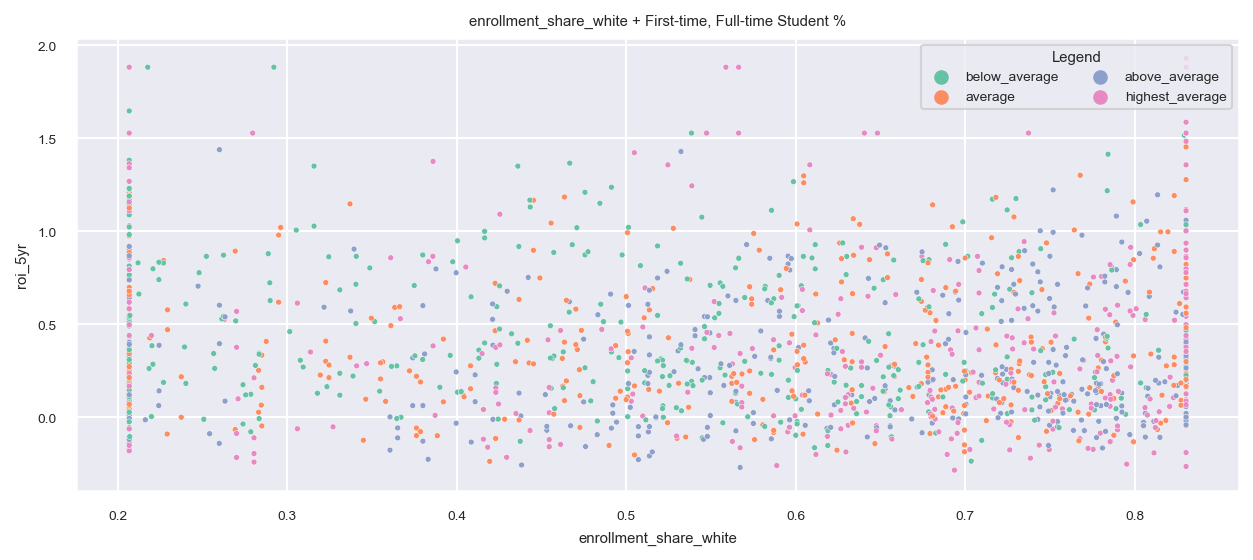

In [ ]:
# plotting ROI and 

enroll_share_lst = [ 
    'enrollment_share_two_races',
    'enrollment_share_native_american',
    'enrollment_share_asian',
    'enrollment_share_black',
    'enrollment_share_hispanic',
    'enrollment_share_pac_islander',
    'enrollment_share_non_resident',
    'enrollment_share_unknown',
    'enrollment_share_white',
]

for i in enroll_share_lst:

    plt.figure(figsize = (10, 4))
    ax = sns.scatterplot( 

        x = i,
        y = "roi_5yr",
        data = train_imputed.sample(1500),
        palette = "Set2",
        s = 8,
        hue = "share_entering_ft_binned"
    )

    ax.legend(loc='upper right',ncol=2, title="Legend")
    plt.title(i + " + " + "First-time, Full-time Student %")
    plt.show()

**``Hypothesis Question #3: ``**

**Is there a difference in ROI earnings across university first-time, full-time student percentage?**

Null Hypothesis: "There's not a statistical 5-year ROI difference across a univertity's first-time, full-time student enrollment %."

Alternative Hypothesis: "There is a statistical 5-year ROI difference across a univertity's first-time, full-time student enrollment %"

--
<br>

Null Hypothesis: "There's not a statistical 10-year ROI difference across a univertity's first-time, full-time student enrollment %."

Alternative Hypothesis: "There is a statistical 10-year ROI difference across a univertity's first-time, full-time student enrollment %."


alpha: 0.05

In [ ]:
train_imputed['share_entering_ft_binned'].unique()

['average', 'below_average', 'highest_average', 'above_average']
Categories (4, object): ['below_average' < 'average' < 'above_average' < 'highest_average']

In [ ]:
# what about 5 yr ROI?

f_statistic, p_value = stats.f_oneway(
                    train_imputed[train_imputed['share_entering_ft_binned'] == 'average']['roi_5yr'].values,
                    train_imputed[train_imputed['share_entering_ft_binned'] == 'below_average']['roi_5yr'].values,
                    train_imputed[train_imputed['share_entering_ft_binned'] == 'above_average']['roi_5yr'].values,
                    train_imputed[train_imputed['share_entering_ft_binned'] == 'highest_average']['roi_5yr'].values,
)

alpha = 0.05

# comparing the p_value to alpha
print(f'f statistic = {f_statistic.round(5)}')
print(f'p value = {p_value.round(5)}')
print("-----------------")

if p_value < alpha:
    print('We reject the null hypothesis. Means are different across the groups.')
else:
    print('We fail to reject the null hypothesis. Means are similar across the groups.')

f statistic = 255.56203
p value = 0.0
-----------------
We reject the null hypothesis. Means are different across the groups.


In [ ]:
# what about 10 yr ROI?

f_statistic, p_value = stats.f_oneway(
                    train_imputed[train_imputed['share_entering_ft_binned'] == 'average']['roi_10yr'].values,
                    train_imputed[train_imputed['share_entering_ft_binned'] == 'below_average']['roi_10yr'].values,
                    train_imputed[train_imputed['share_entering_ft_binned'] == 'above_average']['roi_10yr'].values,
                    train_imputed[train_imputed['share_entering_ft_binned'] == 'highest_average']['roi_10yr'].values,
)

alpha = 0.05

# comparing the p_value to alpha
print(f'f statistic = {f_statistic.round(5)}')
print(f'p value = {p_value.round(5)}')
print("-----------------")

if p_value < alpha:
    print('We reject the null hypothesis. Means are different across the groups.')
else:
    print('We fail to reject the null hypothesis. Means are similar across the groups.')

f statistic = 254.1229
p value = 0.0
-----------------
We reject the null hypothesis. Means are different across the groups.


-----
### ``Creating Dummy Variables``


In [ ]:
# categorical features
train_imputed.select_dtypes(exclude = "number").columns.tolist()

['college_name',
 'institution_control',
 'state_post_code',
 'zip_code',
 'city',
 'degree_name',
 'major_name',
 'med_debt_pell_students',
 'median_debt_completed',
 'median_debt_non_first_generation',
 'median_debt_non_pell',
 'major_category',
 'share_entering_ft_binned']

In [ ]:
# grouping these zip codes into US Continental regions would be good 
train_imputed["zip_code"].nunique()

2290

In [ ]:
# number of unique cities and states

train_imputed["city"].nunique()

1241

In [ ]:
'''Function creates new dataframes with dummy variables for modeling'''
def get_dummy_dataframes(train_df, val_df, test_df):
    # generate dummy variables for the following and scale our data

    # train dataset
    train_dummy = pd.get_dummies(
        data = train_df, 
        columns = [
        'major_category',
        'share_entering_ft_binned',
        'institution_control'],
        drop_first = False, 
        dtype = bool)

    # validate dataset
    validate_dummy = pd.get_dummies(
        data = val_df, 
        columns = [
        'major_category',
        'share_entering_ft_binned',
        'institution_control'],
        drop_first = False, 
        dtype = bool)

    # test dataset
    test_dummy = pd.get_dummies(
        data = test_df, 
        columns = [
        'major_category',
        'share_entering_ft_binned',
        'institution_control'],
        drop_first = False, 
        dtype = bool)

    # returning the datasets
    return train_dummy, validate_dummy, test_dummy

In [ ]:
# before transformation

print(f'train shape: {train_imputed.shape}')
print(f'validate shape: {validate_imputed.shape}')
print(f'test shape: {test_imputed.shape}')

train shape: (39995, 113)
validate shape: (17142, 113)
test shape: (14285, 113)


In [ ]:
# getting dummy variables
# train after transformation

train_dummy, validate_dummy, test_dummy = get_dummy_dataframes(train_imputed, validate_imputed, test_imputed)
train_dummy.shape

(39995, 155)

In [ ]:
# scaling plot using sklearn's RobustScaler to handle any remaining outliers in dataset

cont_lst = train_dummy.select_dtypes(exclude = ["object", "category", "uint8", "int64", "bool"]).columns.tolist()

target_lst = [ 
        "roi_5yr",
        "roi_10yr",
        "roi_20yr",
        "pct_roi_5yr",
        "pct_roi_10yr",
        "pct_roi_20yr"
        "2017",                                               
        "2018",                                                   
        "2019",
        "Grand Total",
        "avg_net_price"
        ]

cont_lst = [col for col in cont_lst if col not in target_lst]

# for col in cont_lst:
#     scaler = RobustScaler()
#     scaler.fit(train_dummy[[col]])

#     x_scaled = scaler.transform(train_dummy[[col]])

#     plt.figure(figsize=(18, 6))
#     plt.subplot(121)
#     sns.histplot(train_dummy[[col]], bins = 25, edgecolor = 'black', label = col)
    
#     plt.title(f'Original: {col}')
#     plt.legend()

#     plt.subplot(122)
#     ax = sns.histplot(x_scaled, bins=25, edgecolor = 'black', label = "scaled")
    
#     # removing axes scientific notation 
#     ax.ticklabel_format(style = "plain") 
#     plt.title(f'Scaled: {col}')
#     plt.legend()

In [ ]:
# transform datasets
# scaling necessary features in datasets

scaler = RobustScaler()
scaler.fit(train_dummy[cont_lst])

# dummy datasets
train_dummy[cont_lst] = scaler.transform(train_dummy[cont_lst])
validate_dummy[cont_lst] = scaler.transform(validate_dummy[cont_lst])
test_dummy[cont_lst] = scaler.transform(test_dummy[cont_lst])

# new dataframe names
train_scaled = train_dummy
validate_scaled = validate_dummy
test_scaled = test_dummy

# non-dummy datasets
# train_imputed[cont_lst] = scaler.transform(train_imputed[cont_lst])
# validate_imputed[cont_lst] = scaler.transform(validate_imputed[cont_lst])
# test_imputed[cont_lst] = scaler.transform(test_imputed[cont_lst])

train_scaled.head()

unit_id_institution            college_name state_post_code  \
25530             0.423414   University of Memphis              TN   
53875             0.383894    Limestone University              SC   
42932             0.537834  Texas State University              TX   
45495            -0.698988       Judson University              IL   
25003             0.074688      Yeshiva University              NY   

         zip_code        city  region_ipeds  title_IV_eligibility  \
25530       38152     Memphis          0.25                   0.0   
53875  29340-3799     Gaffney          0.25                   0.0   
42932       78666  San Marcos          0.50                   0.0   
45495  60123-1498       Elgin         -0.25                   0.0   
25003  10033-3299    New York         -0.50                   0.0   

       pred_degree  pred_degree_0and4        degree_name  degree_code  \
25530          0.0                0.0  Bachelor’s Degree          0.0   
53875          0.0                0.0  Bachelor’s Degree          0.0   
42932          0.0                0.0  Bachelor’s Degree          0.0   
45495          0.0                0.0  Bachelor’s Degree          0.0   
25003          0.0                0.0  Bachelor’s Degree          0.0   

       major_code                                         major_name  \
25530   -0.823927                                        Journalism.   
53875   -0.823927                   Communication and Media Studies.   
42932    0.323339                           Design and Applied Arts.   
45495    0.381834                   Accounting and Related Services.   
25003   -0.673721  Classics and Classical Languages, Literatures,...   

       branch_number  avg_net_price_public  avg_net_price_private  \
25530            0.0              0.969139              -0.579450   
53875            0.0              0.000000               0.451192   
42932            0.0              1.091247              -0.579450   
45495            0.0              0.000000               0.297770   
25003            0.0              0.000000               0.682244   

       full_time_net_tuition_revenue  off_campus_cost_of_attendace  \
25530                      -0.446191                     -0.080134   
53875                       0.046191                     -0.718527   
42932                      -0.416483                     -0.393750   
45495                      -0.205367                     -0.520982   
25003                       0.502156                      0.658259   

       on_campus_cost_of_attendace  admission_rate  graduate_number  \
25530                    -0.196299        0.754616         0.967832   
53875                    -0.550364       -1.195821        -0.306217   
42932                    -0.291869        0.437804         1.039592   
45495                    -0.192354        0.108844        -0.270337   
25003                     0.418083       -0.412536         0.821219   

       ACT_score_mid  avg_sat_admitted  required_score  avg_faculty_salary  \
25530      -0.333333         -0.132566             0.0            0.212325   
53875      -1.000000         -0.997371             0.0           -0.719918   
42932      -0.333333         -0.398660             0.0           -0.060456   
45495      -0.666667         -0.653666             0.0           -0.523949   
25003       0.666667          1.264428             0.0            1.159755   

       online_only  comp_rt_ft_150over_expected_time  \
25530          0.0                         -0.402551   
53875          0.0                         -0.851169   
42932          0.0                         -0.130758   
45495          0.0                          0.158753   
25003          0.0                          0.848689   

       comp_rt_ft_150over_expected_time_two_races  \
25530                                   -0.329457   
53875                                   -0.088583   
42932                                    0.204324   
45495             

In [ ]:
train_scaled.columns.tolist()

['unit_id_institution',
 'college_name',
 'state_post_code',
 'zip_code',
 'city',
 'region_ipeds',
 'title_IV_eligibility',
 'pred_degree',
 'pred_degree_0and4',
 'degree_name',
 'degree_code',
 'major_code',
 'major_name',
 'branch_number',
 'avg_net_price_public',
 'avg_net_price_private',
 'full_time_net_tuition_revenue',
 'off_campus_cost_of_attendace',
 'on_campus_cost_of_attendace',
 'admission_rate',
 'graduate_number',
 'ACT_score_mid',
 'avg_sat_admitted',
 'required_score',
 'avg_faculty_salary',
 'online_only',
 'comp_rt_ft_150over_expected_time',
 'comp_rt_ft_150over_expected_time_two_races',
 'comp_rt_ft_150over_expected_time_native_american',
 'comp_rt_ft_150over_expected_time_asian',
 'comp_rt_ft_150over_expected_time_black',
 'comp_rt_ft_150over_expected_time_hispanic',
 'comp_rt_ft_150over_expected_time_non_resident',
 'comp_rt_ft_150over_expected_time_unknown_race',
 'comp_rt_ft_150over_expected_time_white',
 'share_entering_students_first_ft',
 'share_of_part_time',

In [ ]:
# cluster number 1: institution control
# setting features to cluster on 

X_control = train_scaled[[
    'required_score',
    'institution_control_Foreign',
    'institution_control_Private, for-profit',
    'institution_control_Private, nonprofit',
    'institution_control_Public'
    ]]

# validate df
X_val = validate_scaled[[
    'required_score',
    'institution_control_Foreign',
    'institution_control_Private, for-profit',
    'institution_control_Private, nonprofit',
    'institution_control_Public'
    ]]

# test df
X_test = test_scaled[[
    'required_score',
    'institution_control_Foreign',
    'institution_control_Private, for-profit',
    'institution_control_Private, nonprofit',
    'institution_control_Public'
    ]]

X_control.head()

required_score  institution_control_Foreign  \
25530             0.0                        False   
53875             0.0                        False   
42932             0.0                        False   
45495             0.0                        False   
25003             0.0                        False   

       institution_control_Private, for-profit  \
25530                                    False   
53875                                    False   
42932                                    False   
45495                                    False   
25003                                    False   

       institution_control_Private, nonprofit  institution_control_Public  
25530                                   False                        True  
53875                                    True                       False  
42932                                   False                        True  
45495                                    True                       False  
25003                                    True                       False

In [ ]:
# initial fitting of KMeans cluster

kmeans = KMeans(n_clusters = 9)
kmeans.fit(X_control)

train_clusters = kmeans.predict(X_control)

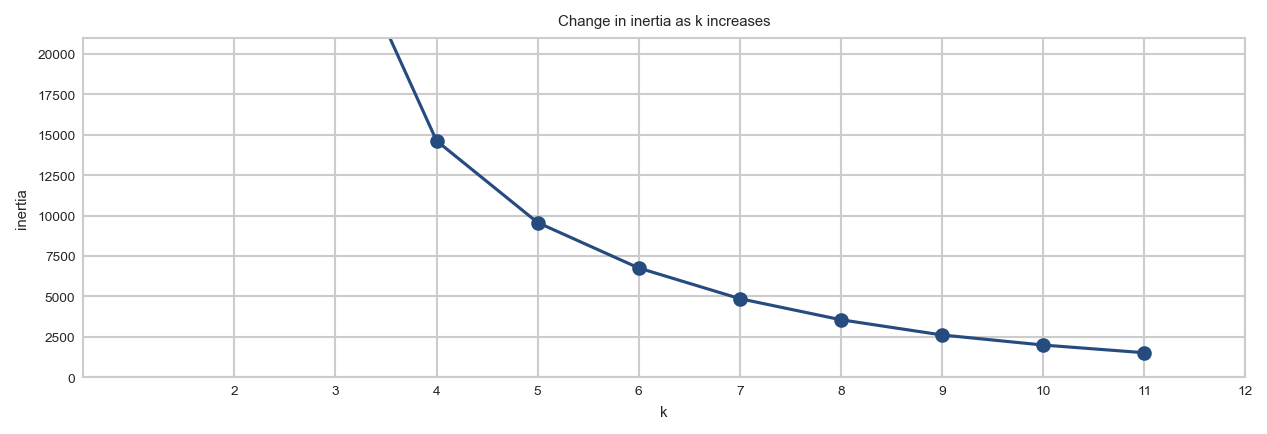

In [ ]:
# KMeans Elbow-method

with plt.style.context('seaborn-whitegrid'):

    plt.figure(figsize=(10, 3))
    pd.Series({k: KMeans(k).fit(X_control).inertia_ for k in range(1, 12)}).plot(marker = 'o')
    plt.xticks(range(2, 13))
    
    plt.ylim(0, 21000)
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

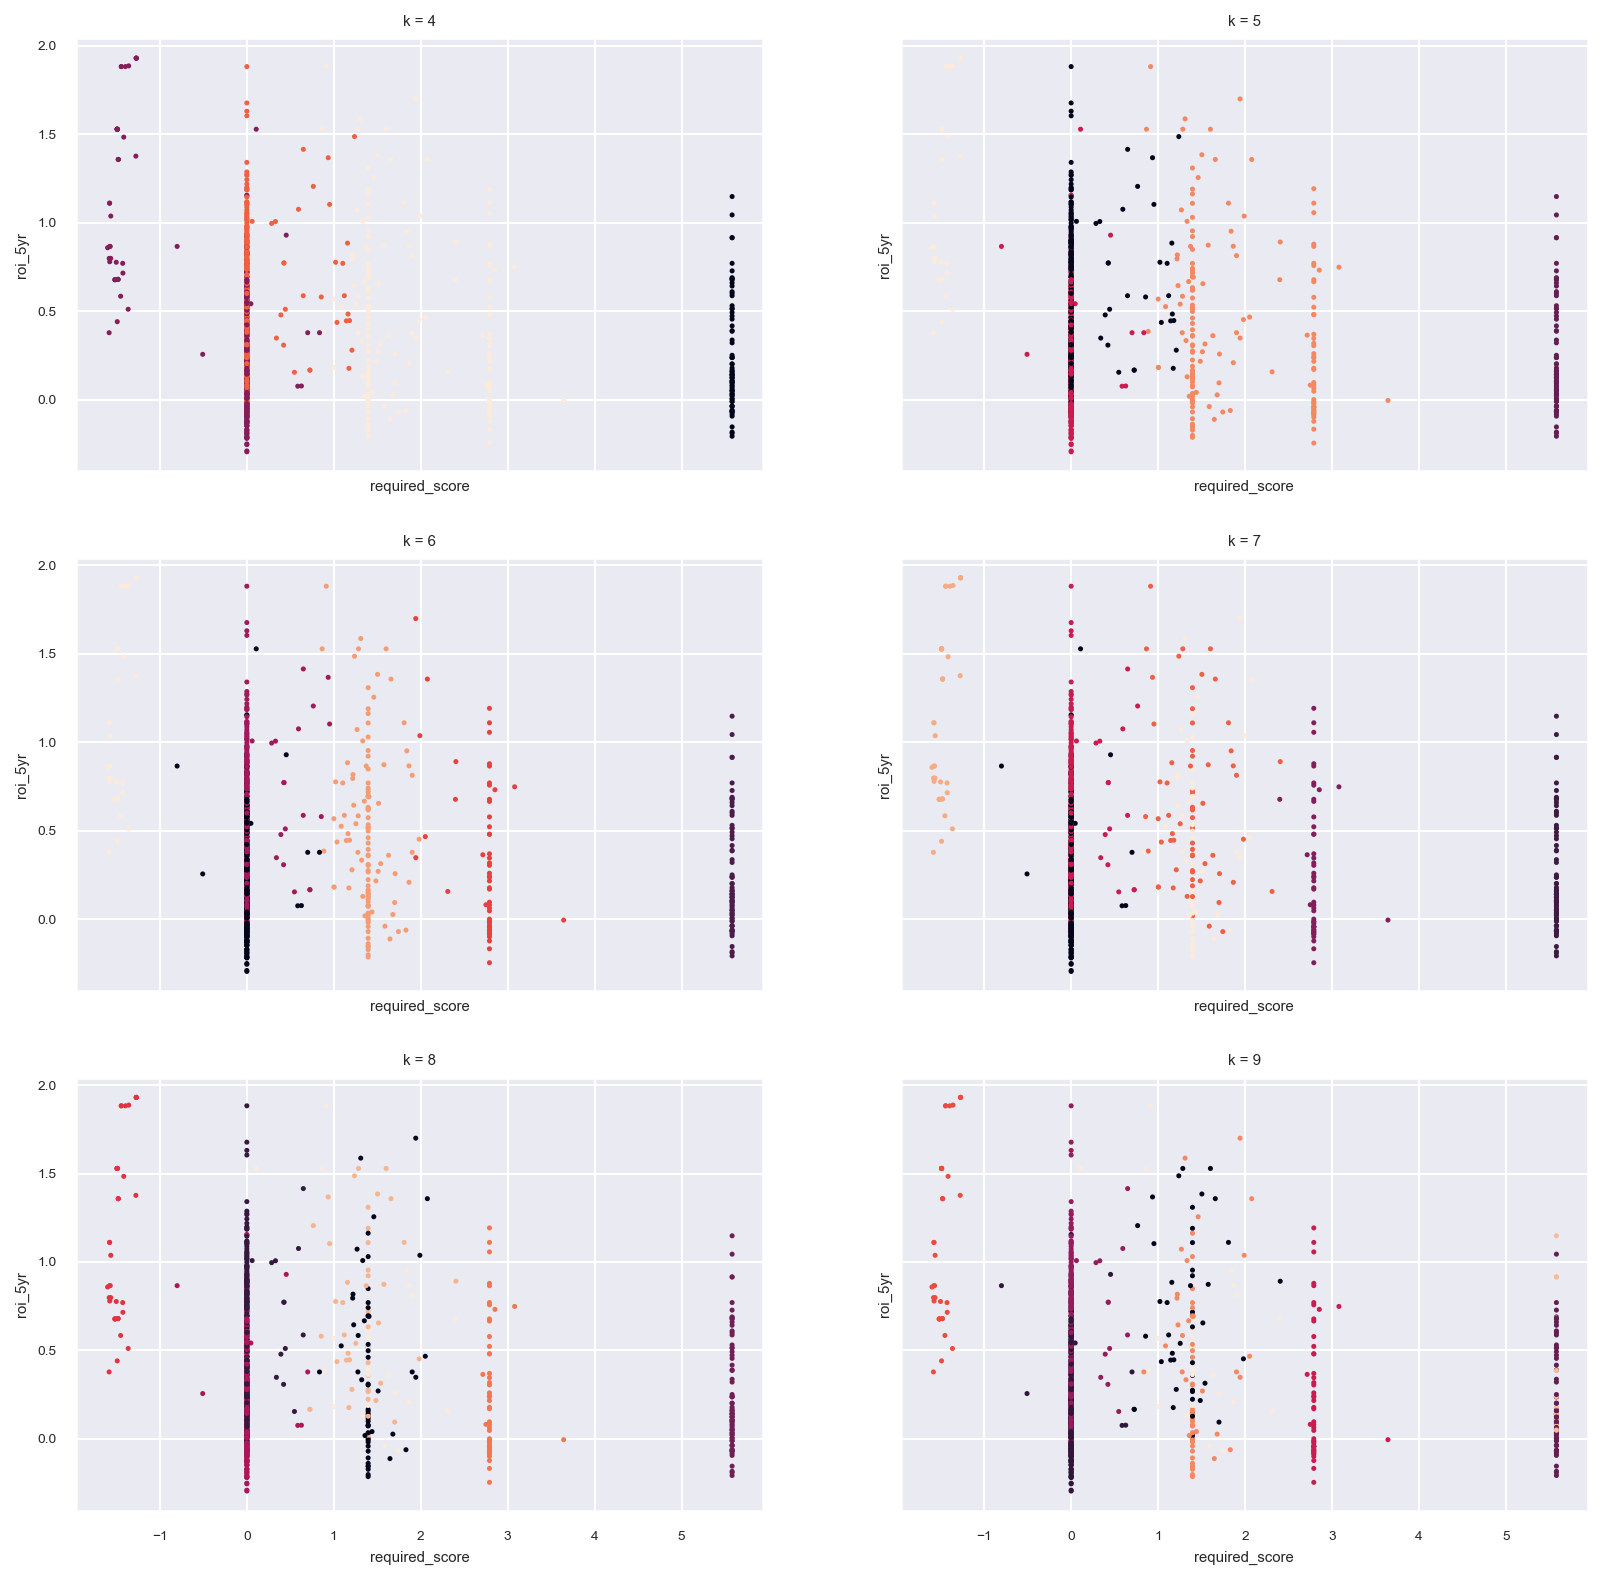

In [ ]:
# plotting inertia for number of KMeans clusters

fig, axs = plt.subplots(3, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(4, 13)):
    
    X1 = X_control.sample(1000, random_state = 123)

    # creating and fitting KMeans
    clusters = KMeans(k).fit(X1).predict(X1)

    X1["roi_5yr"] = train_scaled["roi_5yr"]

    ax.scatter(
        X1["required_score"],
        X1["roi_5yr"],
        c = clusters,
        s = 2)

    ax.set(title='k = {}'.format(k), xlabel = 'required_score', ylabel = 'roi_5yr')